<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/008_superstore_Loss_Discount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loss and Discounts Summary Analysis

#### Key Insights:
1. **Discounts and Losses Relationship**:
   - Loss-making transactions are significantly impacted by high discounts, averaging **51.5%**, compared to just **8.1%** in profitable transactions.
   - **Median discounts** are **60%** for losses and **0%** for profits, highlighting the detrimental effect of aggressive discounting strategies.
   - **Maximum discounts** reach **80%** in loss-making transactions, double the 40% cap in profitable ones.

2. **Regional Losses and Discounts**:
   - **Central Region**:
     - The region exhibits the highest discounts (average **59.5%**) and variability, leading to large losses in categories like Appliances and Binders.
     - High cost variability indicates operational inefficiencies.
   - **South Region**:
     - Discounts average **51.8%**, eroding already thin margins. Losses remain moderate but consistent.
     - The smallest market share (**17.1%**) suggests that heavy discounts are not driving significant sales volume.
   - **East Region**:
     - Discounts are also high (**46.8%**), and high operational costs drive losses.
   - **West Region**:
     - Lowest discounts (**38.4%**) among regions, yet inefficiencies in categories like Bookcases and Tables persist.

3. **Category-Level Impact**:
   - **Office Supplies**:
     - Highest discount dependency with **64.36% average discounts**, leading to substantial losses, especially in Appliances and Binders.
   - **Furniture**:
     - Discounts average **30%**, with Tables and Furnishings driving losses.
   - **Technology**:
     - Discounts are lower (**20% median**), with Machines and Phones showing losses but retaining potential due to higher customer demand.

4. **Profitability Trends**:
   - Losses have worsened year over year, with a **15% increase** in mean losses from 2014 to 2017.
   - Discounts have remained stable but excessive, peaking at **80%** in some cases.
   - Costs have risen by **24%** from 2014 to 2017, compounding losses.

---

#### Recommendations for Immediate Action:
1. **Strategic Discounting**:
   - Implement thresholds to cap discounts at 40% for most products and 20% for historically loss-making categories like Appliances, Tables, and Binders.
   - Introduce data-driven discount policies that focus on high-margin products and regions with strong market presence.

2. **Cost Optimization**:
   - Investigate and control rising costs in regions like Central and South, where high discounts amplify losses.
   - Streamline supply chain and inventory management to address inefficiencies in cost-heavy sub-categories.

3. **Category-Specific Interventions**:
   - **Office Supplies**: Reduce deep discounts in Binders and Appliances; focus on increasing margins.
   - **Furniture**: Optimize operations in Furnishings and Tables, which consistently underperform.
   - **Technology**: Leverage customer demand to refine pricing strategies in Phones and Accessories.

4. **Regional Focus**:
   - **Central**: Aggressively reduce discounts and address cost variability to stabilize losses.
   - **South**: Enhance market share through targeted campaigns while reducing reliance on heavy discounts.
   - **East and West**: Optimize cost structures in high-cost sub-categories like Bookcases and Tables.



### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


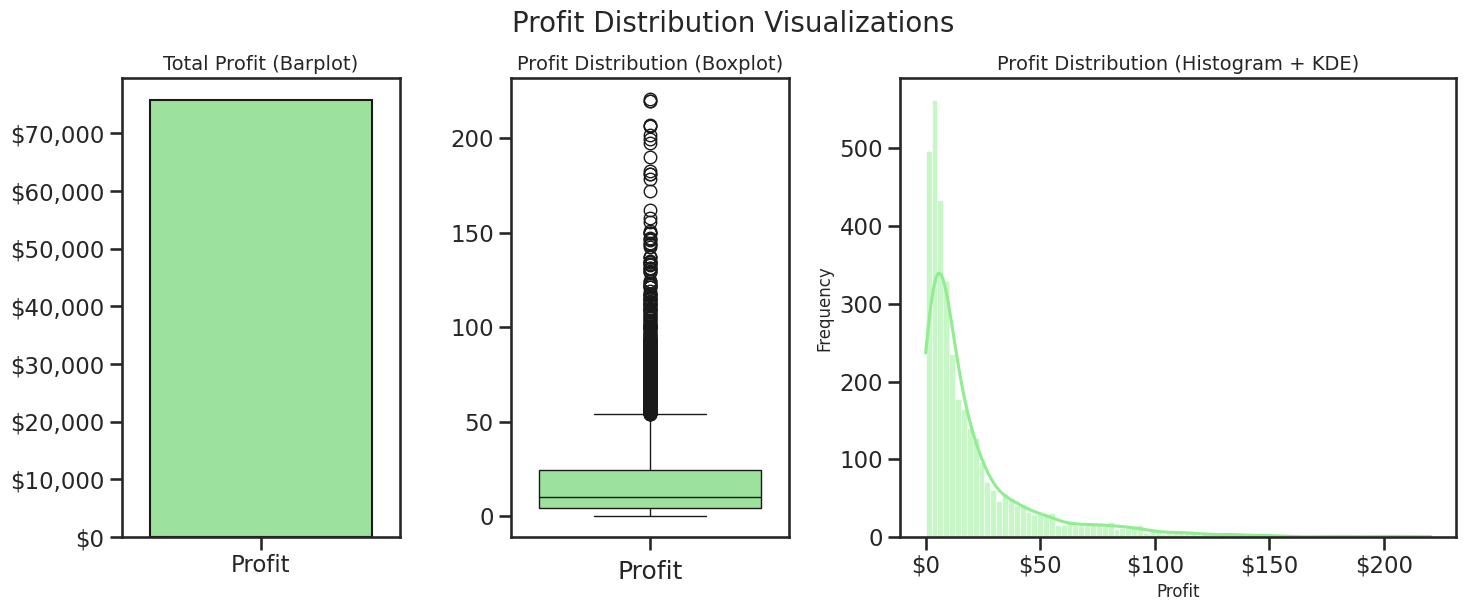

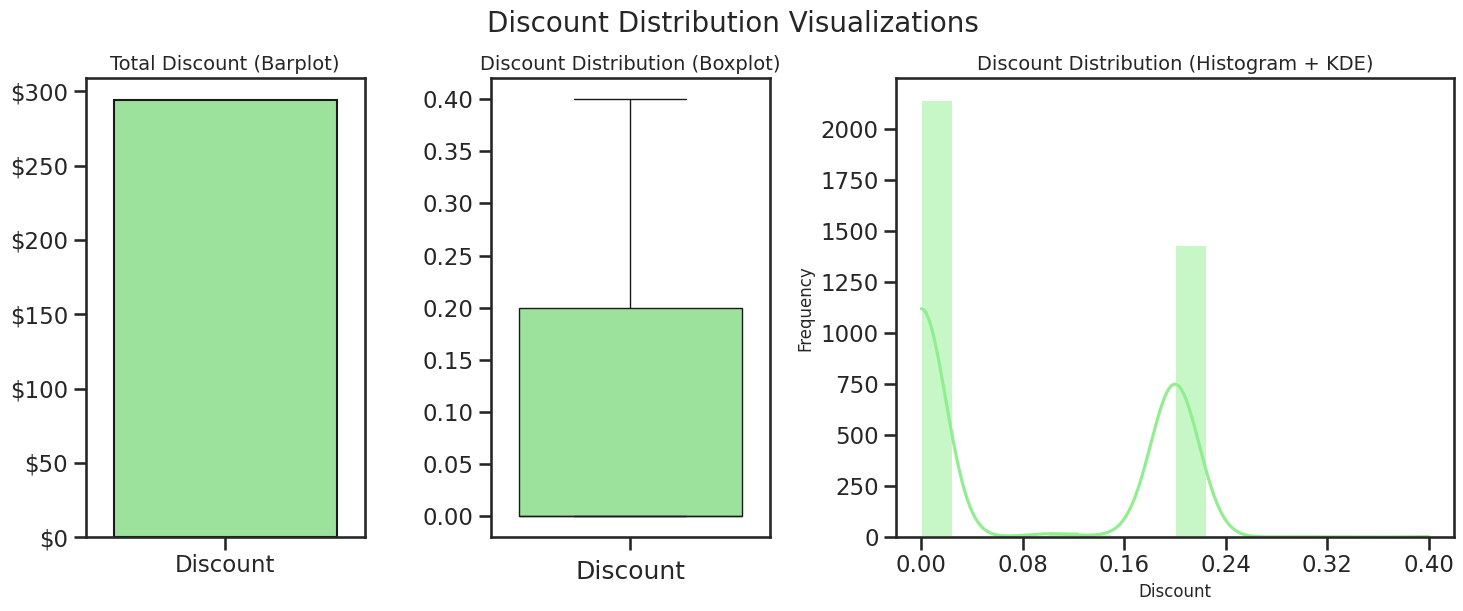

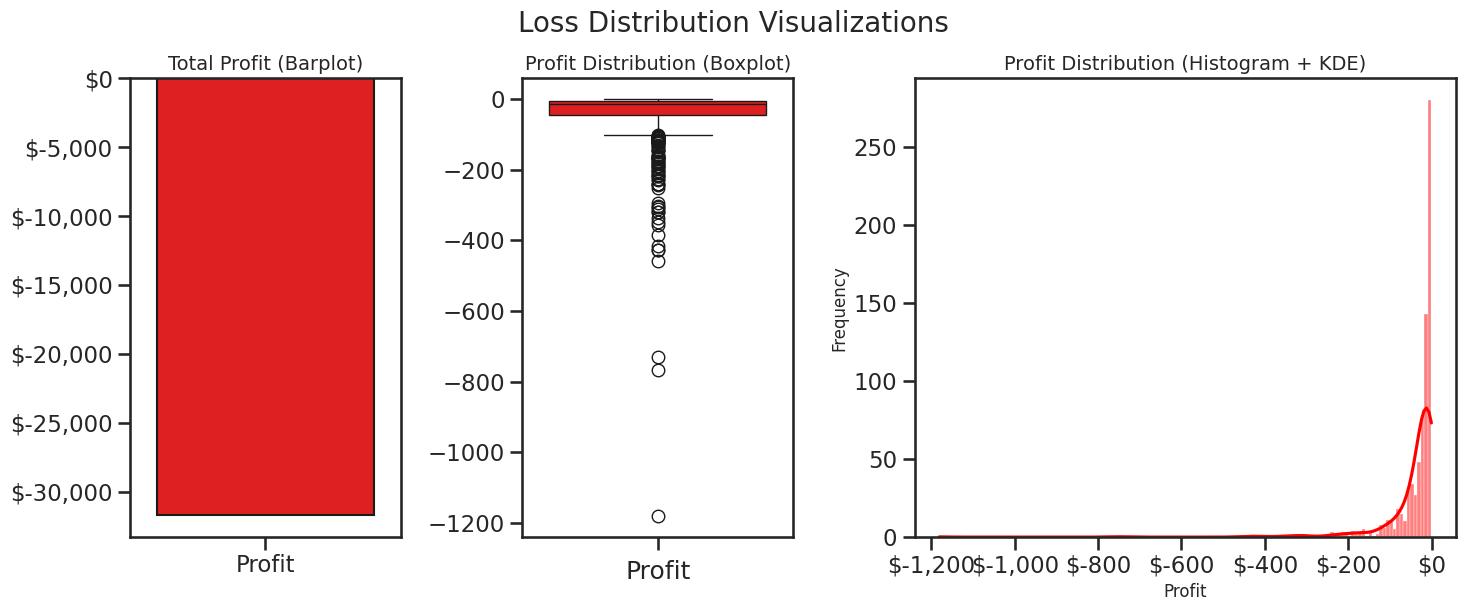

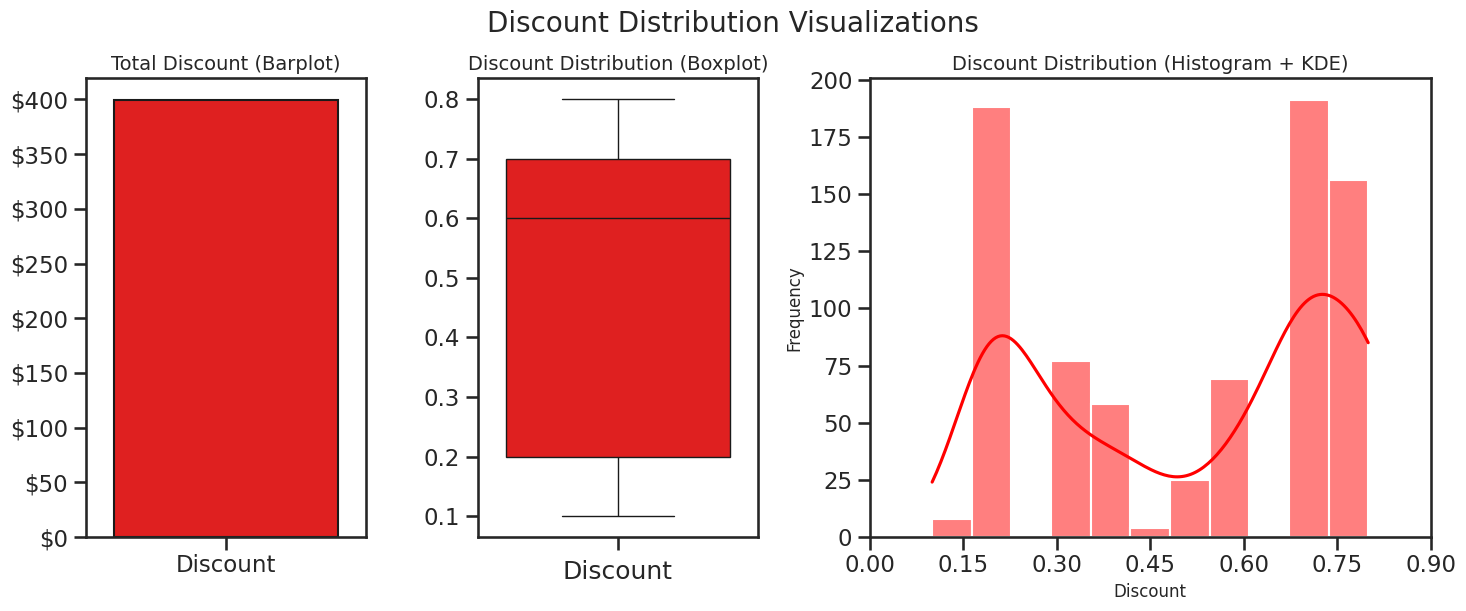

In [4]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the profit and discountdata
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')
dvu.plot_sales_distribution_2(data_profits, column='Discount', title='Discount Distribution Visualizations', color='lightgreen')

# plot the loss and discountdata
dvu.plot_sales_distribution(data_losses , column='Profit', title='Loss Distribution Visualizations', color='red')
dvu.plot_sales_distribution_2(data_losses , column='Discount', title='Discount Distribution Visualizations', color='red')


### Splitting Data into Profits and Losses Rationale

Analyzing profits and losses separately is a strategic approach to uncover the underlying causes of financial performance and inform actionable decisions. Here’s why this methodology makes sense:

1. **Targeted Analysis of Losses:** By isolating data with losses, the analysis can focus specifically on identifying patterns and drivers behind negative profitability, such as high discounts, excessive costs, or inefficient operations, without being diluted by profitable transactions.

2. **Distinct Characteristics:** Profitable and loss-making transactions often have fundamentally different attributes (e.g., discount levels, cost structures). Separating these datasets ensures that trends and anomalies unique to each group are not obscured in aggregated analysis.

3. **Actionable Insights:** Understanding what differentiates loss-making transactions from profitable ones allows for precise interventions, such as adjusting pricing strategies, optimizing cost controls, or targeting high-loss segments.

4. **Visualization and Clarity:** Plotting profits and losses independently makes it easier to visualize their distinct distributions, such as the broader range of costs and higher discount levels in loss-making data, leading to clearer storytelling and better stakeholder communication.

5. **Improved Decision-Making:** This approach ensures that decisions are data-driven and context-specific, helping to minimize losses while reinforcing strategies that maximize profitability.

Figure saved as /content/loss_discount_sumamry_stats.png


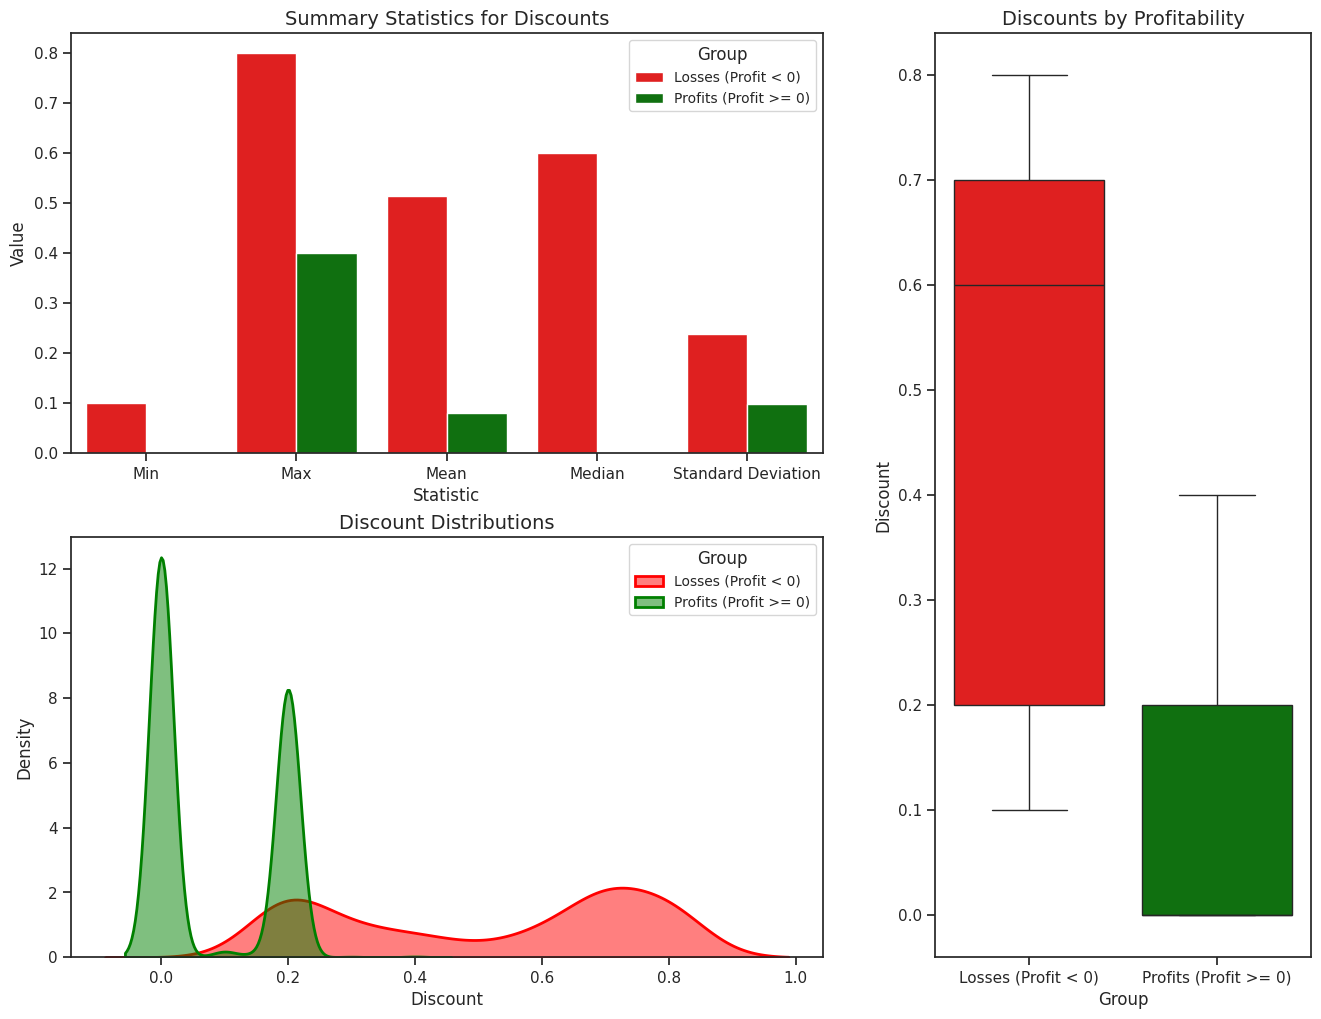

In [5]:
# Calculate stats for both groups
discount_stats_losses = dvu.calculate_discount_stats(data_losses, column='Discount')
discount_stats_profits = dvu.calculate_discount_stats(data_profits, column='Discount')

# Combine the stats into a single DataFrame
discount_summary_table = pd.DataFrame({
    'Statistic': discount_stats_losses.keys(),
    'Losses (Profit < 0)': discount_stats_losses.values(),
    'Profits (Profit >= 0)': discount_stats_profits.values()
})

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_sumamry_stats.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Call the function
dvu.plot_discount_analysis_grid(data_losses, data_profits, discount_summary_table, column='Discount')

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Profits and Discounts Analysis of

1. **Discount Range and Averages**:
   - **Losses**: Discounts range from **10%** to **80%**, with an **average discount** of **51.47%**, indicating a strong correlation between high discounts and loss-making transactions.
   - **Profits**: Discounts range from **0%** to **40%**, with an **average discount** of only **8.12%**, reflecting that profitable transactions typically involve minimal discounting.

2. **Profit Range and Averages**:
   - **Losses**: Profits range as high as **-\$1,181.28**, with an **average profit** of **-\$40.88**, clearly reflecting significant losses.
   - **Profits**: Profits range from **\$0.00** to **\$220.49**, with an **average profit** of **\$20.92**, showing much healthier financial outcomes for profitable transactions.

3. **Central Tendency (Median)**:
   - **Losses**: The **median discount** is **60%**, highlighting that most loss-making transactions involve steep discounts.
   - **Profits**: The **median discount** is **0%**, suggesting that the majority of profitable transactions do not rely on discounts to drive sales.

4. **Variation in Discounts (Spread)**:
   - **Losses**: The **standard deviation** of discounts is **23.76%**, showing a wide variability, possibly from inconsistent discounting strategies.
   - **Profits**: The **standard deviation** of discounts is only **9.82%**, reflecting tighter control over discounting.

### Key Insights for the Business Manager:
- Loss-making transactions are strongly associated with excessive discounts, often exceeding **50%**, which undermine profitability.
- Profitable transactions generally involve minimal or no discounting, highlighting the importance of maintaining tighter pricing strategies.
- To reduce losses, reevaluating and limiting discounting policies is critical, especially for transactions involving heavy discounts above **50%**.

In [6]:
# Generate descriptive statistics for losses and profits
losses_stats = data_losses[['Profit', 'Discount']].describe().transpose()
profits_stats = data_profits[['Profit', 'Discount']].describe().transpose()

# Add a column to indicate whether the stats are for losses or profits
losses_stats['Category'] = 'Losses'
profits_stats['Category'] = 'Profits'

# Combine the two tables into a single DataFrame
combined_stats = pd.concat([losses_stats, profits_stats])

# Move the 'Category' column to the front for clarity
combined_stats = combined_stats.reset_index().rename(columns={'index': 'Metric'})
combined_stats = combined_stats[['Category', 'Metric'] + [col for col in combined_stats.columns if col not in ['Category', 'Metric']]]

# Display the combined table
combined_stats

,Category,Metric,count,mean,std,min,25%,50%,75%,max
0,Losses,Profit,776.0,-40.877741,82.413352,-1181.2824,-44.1855,-14.3856,-5.698125,-0.2685
1,Losses,Discount,776.0,0.514652,0.237637,0.1000,0.2000,0.6000,0.700000,0.8000
2,Profits,Profit,3623.0,20.916086,28.072311,0.0000,4.3281,10.0485,24.222300,220.4853
3,Profits,Discount,3623.0,0.081162,0.098241,0.0000,0.0000,0.0000,0.200000,0.4000


### **Discount Statistics Summary Anlaysis**

1. **Key Comparisons**:
   - **Mean Discount**: Loss-making transactions have a significantly higher **mean discount (51.47%)** compared to profitable transactions (8.12%), indicating discounts are more aggressively applied to loss-making items.
   - **Median Discount**: Discounts in losses are **60.00%**, while profitable transactions often have no discount (0%), highlighting a stark difference in pricing strategies.
   - **Maximum Discount**: Losses reach a **maximum discount of 80%**, double the **40%** seen in profitable transactions, suggesting over-discounting may drive losses.

2. **Distribution Differences**:
   - Losses exhibit greater variability, with a **standard deviation of 23.76%**, compared to only 9.82% for profits. This wide range underscores inconsistent discounting practices in loss-making transactions.
---

### **Key Takeaways**
1. **Deep Discounts Drive Losses**:
   - Loss-making transactions are characterized by significantly higher and more variable discounts.
   - Over 50% of loss-making transactions have discounts of 60% or higher.

2. **Profits Favor Low or No Discounts**:
   - Profitable transactions typically have no discount or very minimal discounts (average of 8.1%).

3. **Strategic Discounting Is Necessary**:
   - Review and refine discounting policies, particularly for transactions approaching 50%-80% discounts.
   - Implement thresholds or rules to limit excessive discounts in low-margin scenarios.

4. **Focus on Standardization**:
   - The variability in discounting for loss-making transactions suggests a need for more consistent discounting practices to align with profitability goals.



## Discount & Losses by Year

In [7]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])
table_profits

,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467


Figure saved as /content/profit_by_year_3x3.png


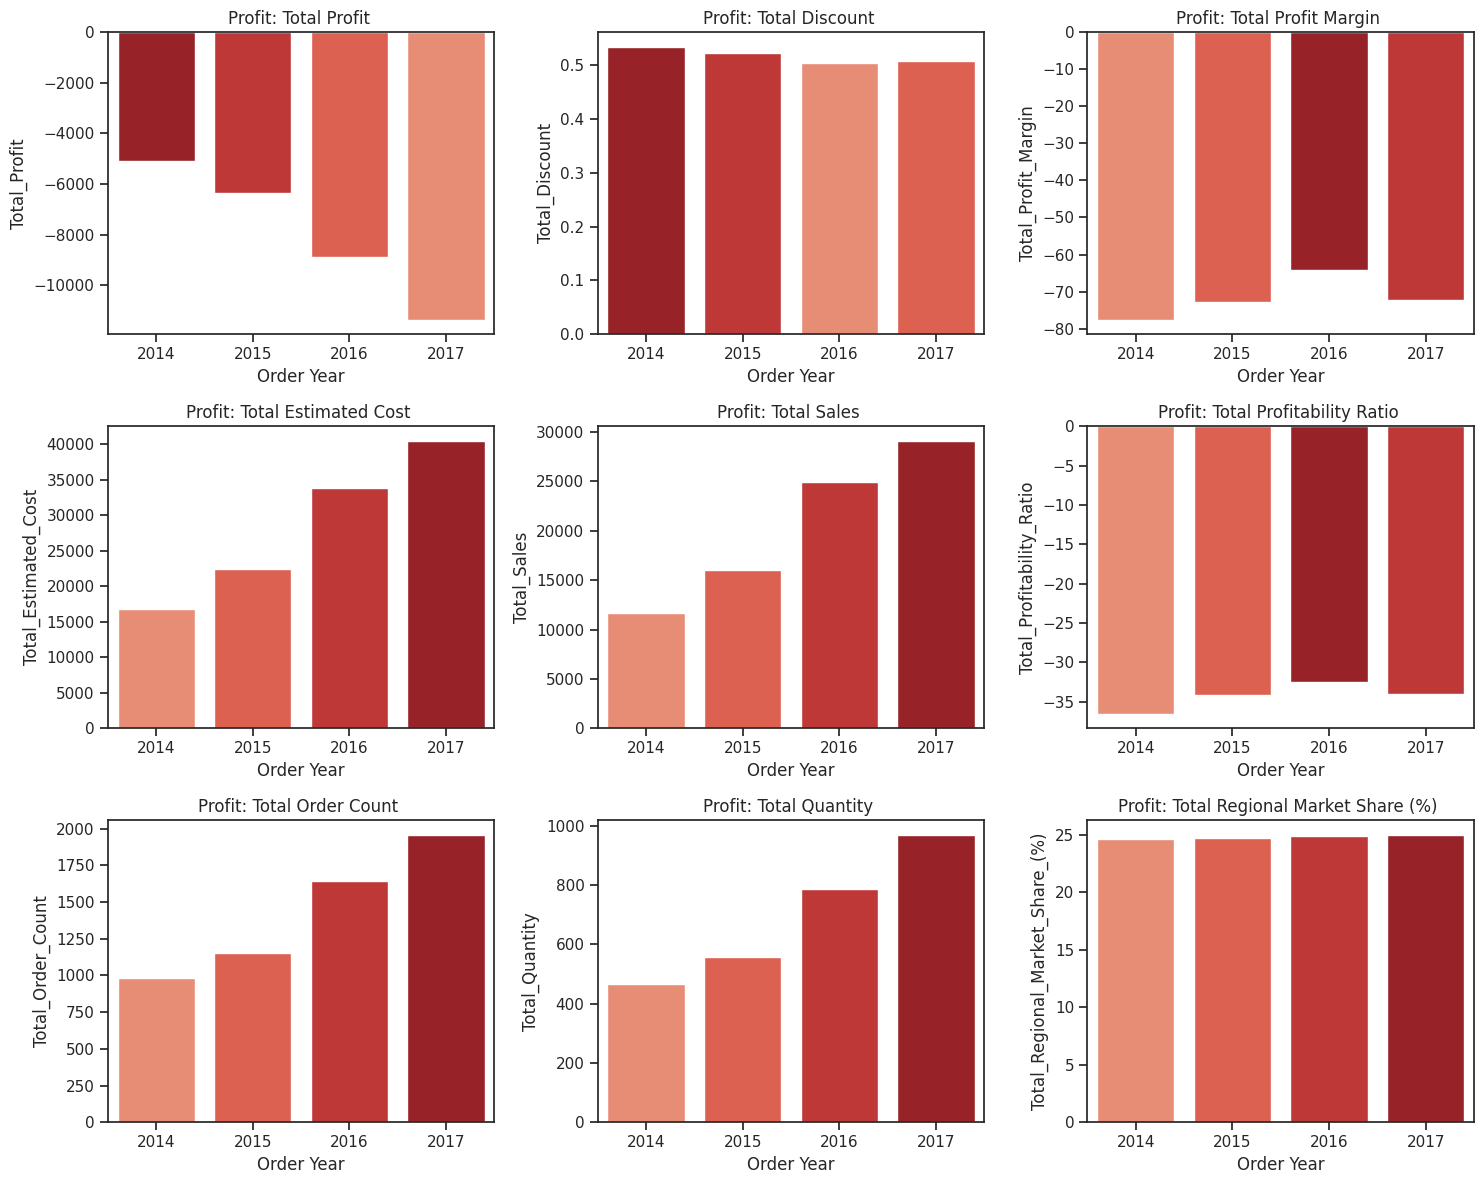

In [8]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_year_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### **Losses** and **Discounts** by Year Analysis

1. **Increasing Losses Over Time**:
   - Losses increased significantly from **-\$5,094.72 in 2014** to **-\$11,372.35 in 2017**, more than doubling over the four years. This trend highlights escalating inefficiencies and warrants immediate attention.

2. **Profit Margins Show Persistent Weakness**:
   - Margins remain consistently negative, ranging from **-77.65% in 2014** to **-72.39% in 2017**, indicating sustained pricing or cost-related issues.

3. **Discount Levels**:
   - Discounts are relatively stable across the years, from **0.53 in 2014** to **0.51 in 2017**, suggesting that excessive discounting is a persistent problem that has not been adequately addressed.

4. **Rising Costs and Sales**:
   - **Estimated costs** rose steeply from **\$16,819.98 in 2014** to **\$40,499.63 in 2017**, reflecting inefficiencies in cost control.
   - **Sales** increased proportionally, from **\$11,725.26 in 2014** to **\$29,127.28 in 2017**, yet losses continue to grow, showing that higher sales volumes are not translating into profitability.

5. **Key Focus Areas**:
   - **2017** shows the highest losses and discounts, suggesting that the discount strategy and cost structure need critical evaluation. Improved discount management and cost reduction could substantially reduce losses.

### Loss & Discount - Summary Statistics

In [9]:
# Define metrics for visualization
metrics = [
    'Profit',
    'Discount',
    'Profit Margin',
    'Estimated Cost',
    'Sales',
    'Profitability Ratio',
    'Order Count',
    'Quantity',
    'Regional Market Share (%)'
]

# Generate the summary table
summary_table = dvu.summarize_metrics_by_group(df, metrics, group_column='Order Year')

# Display the results
print("\nSummary Table by Year:")
summary_table


Summary Table by Year:


,Summary_Stats,Order Year,Profit,Discount,Profit Margin,Estimated Cost,Sales,Profitability Ratio,Order Count,Quantity,Regional Market Share (%)
0,Mean,2014,-36.918268,0.534420,-77.652874,121.883891,84.965623,-36.527573,7.115942,3.391304,24.668116
1,Median,2014,-13.677250,0.600000,-67.333333,48.349200,25.984000,-40.238095,7.000000,3.000000,21.819594
2,Mode,2014,-7.476000,0.800000,-70.000000,16.020000,2.502000,-43.396226,6.000000,3.000000,21.819594
3,Standard Deviation,2014,62.998020,0.235979,67.543025,155.690548,113.464526,20.237477,2.380187,1.968492,4.854456
4,Mean,2015,-41.000654,0.523032,-72.897417,144.315639,103.314986,-34.182110,7.419355,3.606452,24.755537
5,Median,2015,-12.916800,0.600000,-68.000000,57.681000,35.360000,-40.476190,8.000000,3.000000,21.819594
6,Mode,2015,-100.920000,0.700000,-70.000000,5.008200,2.946000,-42.307692,5.000000,2.000000,21.819594
7,Standard Deviation,2015,104.189823,0.241380,68.525966,194.292838,128.177778,21.594246,2.635598,2.172726,5.063042
8,Mean,2016,-41.198863,0.503796,-64.173640,156.881229,115.682366,-32.491276,7.601852,3.648148,24.947869
9,Median,2016,-16.178200,0.600000,-50.000000,82.386400,61.539000,-33.333333,7.000000,3.000000,21.819594


In [ ]:
filtered_table = summary_table[
    (summary_table['Summary_Stats'] == 'Mean') &
    ((summary_table['Order Year'] == 2014) | (summary_table['Order Year'] == 2017))
]['Profit']

# Calculate percentage change
percentage_change = (filtered_table.iloc[1] - filtered_table.iloc[0]) / filtered_table.iloc[0] * 100
print(f"Percentage change: {percentage_change}%")

Percentage change: 15.371263220908446%


### Loss by Year Plots - Summary Statistics

Figure saved as /content/loss_by_year.png


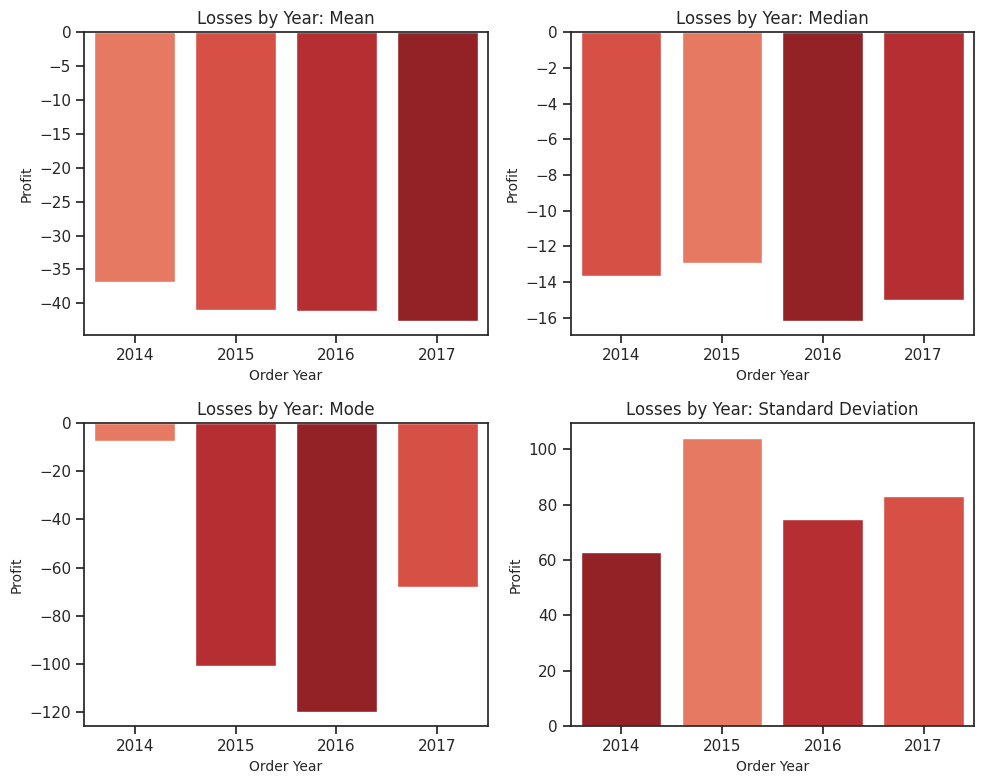

In [ ]:
# Define the summary statistics to plot
summary_stats = ['Mean', 'Median', 'Mode', 'Standard Deviation']

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Visualize the metrics and save the figure
save_path = "/content/loss_by_year_2x2.png"

# Define a subset of darker blues for cost analysis
custom_palette = sns.color_palette("Reds_r", n_colors=7)[:4]  # Select the darker shades

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid_year(
    data=summary_table,
    metric='Profit',
    group_by_column='Order Year',
    stats=summary_stats,
    title_prefix="Losses by Year: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Discount by Year Plots - Summary Statistics

Figure saved as /content/loss_discount_by_year.png


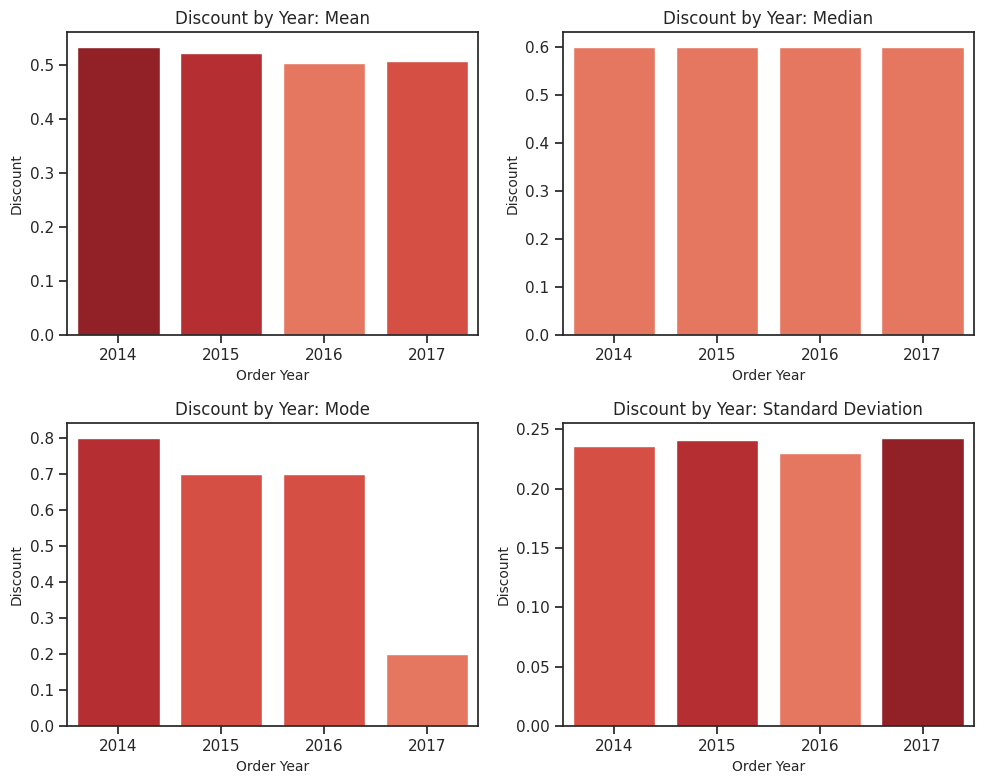

In [ ]:
# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker blues for cost analysis
custom_palette = sns.color_palette("Reds", n_colors=7)[3:]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_by_year_2x2.png"

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid_year(
    data=summary_table,
    metric='Discount',
    group_by_column='Order Year',
    stats=summary_stats,
    title_prefix="Discount by Year: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Discounts and Losses Analysis - Summary Statistics


#### 1. **Loss Trends (Profits):**
   - **Mean Losses:** Losses have consistently worsened over the years, starting at an average loss of **-36.92** in 2014 and growing to **-42.59** by 2017. This reflects a **15% increase in average yearly losses.**
   - **Variability:** Standard deviation in losses increased significantly from **62.99 in 2014 to 83.22 in 2017**, indicating more variability and larger swings in negative profits.
   - **Deepest Losses:** The "Mode" (most frequent value) of losses highlights especially problematic years:
     - 2016 saw the largest single recurring loss at **-120.05**, driven by extremely negative profitability ratios and margins.

#### 2. **Discounts:**
   - Discounts have stayed fairly stable around **0.50 to 0.60** on average, with slight fluctuations. However, discounts **peaked at 0.80 in some cases**, indicating occasional aggressive discounting.
   - Discounts correlate directly with higher losses, suggesting that steep discounting strategies are likely eroding profitability.

#### 3. **Profitability and Cost Ratios:**
   - **Profitability Ratios:** The profitability ratio improved slightly from **-36.53% in 2014** to **-33.96% in 2017**, but this improvement is marginal and overshadowed by growing total losses.
   - **Costs:** Estimated costs increased by **24%** from **121.88 in 2014** to **151.68 in 2017**, suggesting inefficiencies or rising expenses contributing to losses.

#### 4. **Key Observations:**
   - Despite increasing losses, discounts have not been effectively reduced. Aggressive discounting strategies may need to be re-evaluated as they appear unsustainable.
   - The rising costs year over year, coupled with steep discounts, are a dual problem that exacerbates losses.
   - Variability in profitability metrics indicates inconsistency, which could reflect poor inventory or pricing management.

---

### Recommendations:
1. **Revisit Discount Strategies:** Identify and limit excessive discounting practices. Consider targeted discounts for high-margin products rather than blanket reductions.
2. **Control Costs:** Perform a cost analysis to pinpoint drivers of rising costs and implement cost-saving measures in operations, logistics, or procurement.
3. **Focus on High-Impact Loss Areas:** Investigate the products, categories, or regions contributing most to the losses to design specific interventions.






## Region

In [ ]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_region = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region'])
table_profits_region

,Region,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,-16128.3345,-108.814011,-43.695413,41594.8857,25466.5512,0.594506,2368,1225,21.819594
1,East,-8084.3891,-42.716919,-26.974108,37155.7851,29071.3960,0.468182,1634,709,29.548188
2,South,-2768.4291,-51.456492,-31.323555,11949.1321,9180.7030,0.518349,786,397,17.052140
3,West,-4739.9743,-40.195122,-23.745576,22875.0783,18135.1040,0.384146,945,454,31.580078


Figure saved as /content/profit_by_region_3x3.png


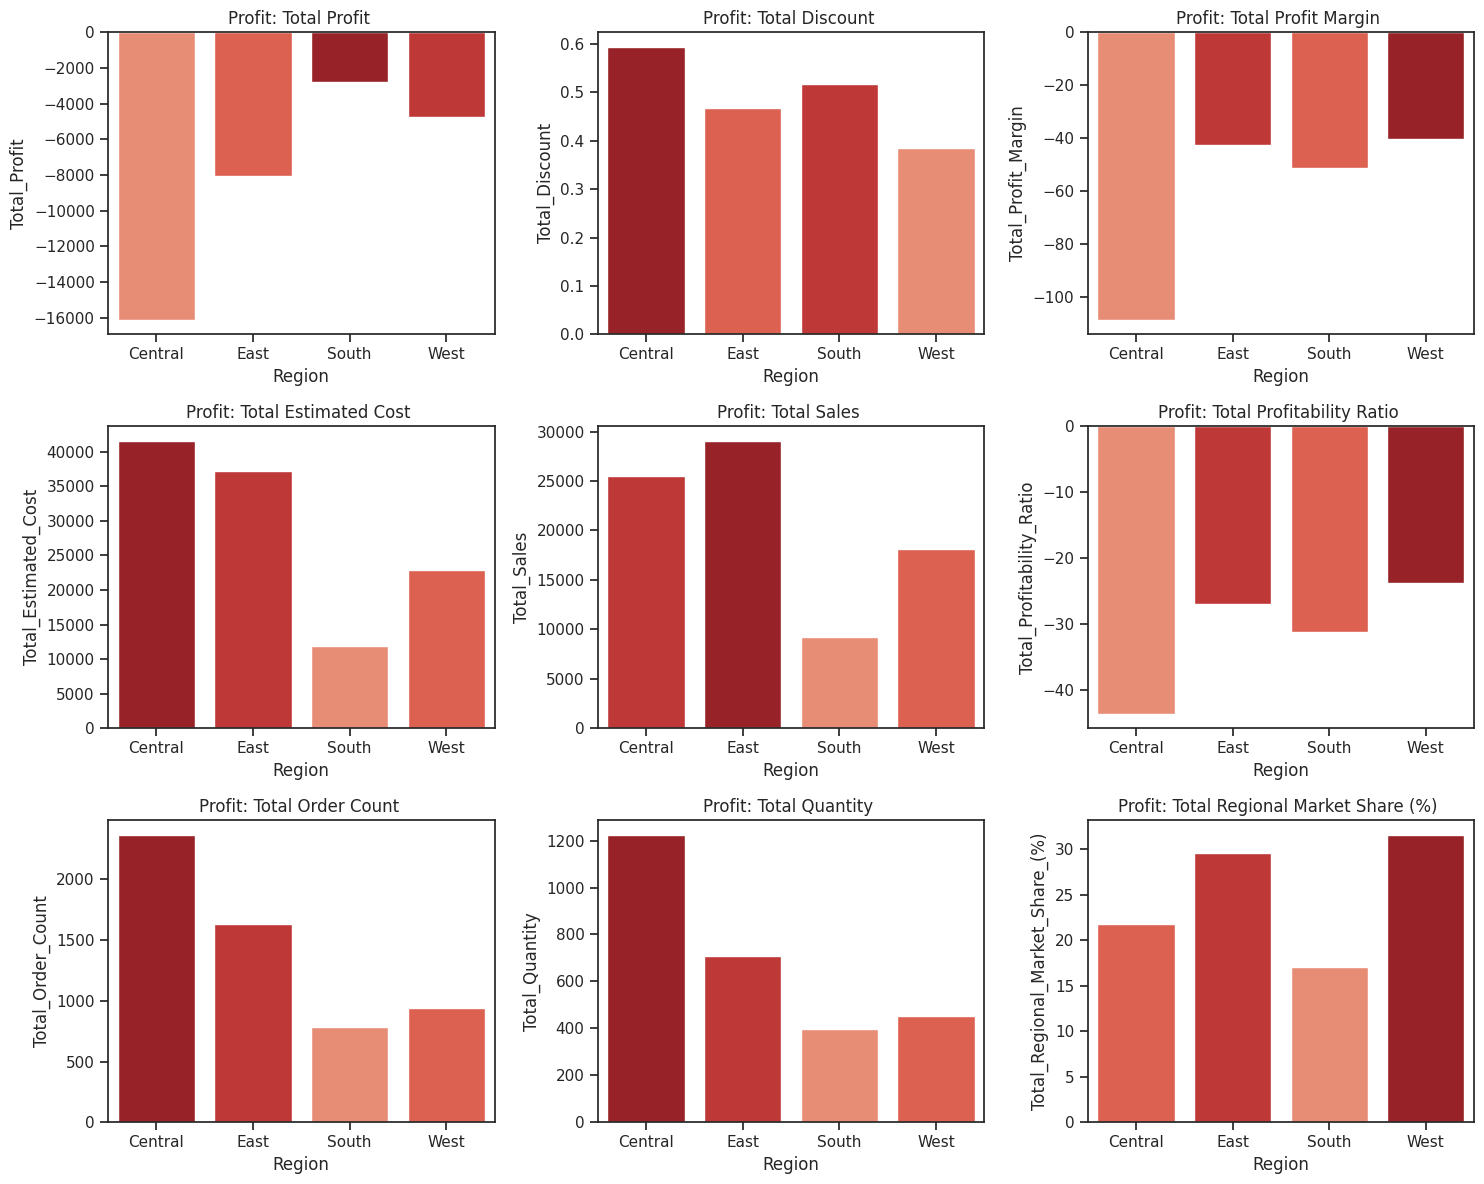

In [ ]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_region,
    metrics=metrics,
    group_by_column='Region',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Discount & Profit by Region Analysis

1. **Central Region**:
   - **Highest losses** at **-\$16,128.33**, with a very poor **profit margin of -108.81%**, indicating deep inefficiencies.
   - **Highest average discount** at **0.59**, which likely contributes significantly to the profit challenges. Pricing strategies should be reviewed immediately.

2. **East Region**:
   - Losses at **-\$8,084.39**, with a **profit margin of -42.72%**, reflecting significant but manageable inefficiencies.
   - Discounts are moderate at **0.47**, suggesting there’s room for cost or pricing optimization to improve profitability.

3. **South Region**:
   - **Lowest losses** at **-\$2,768.43**, with a **profit margin of -51.46%**, showing moderate inefficiencies compared to other regions.
   - Discounts are relatively high at **0.52**, suggesting that profit margins could be improved by reducing discounts.

4. **West Region**:
   - Losses of **-\$4,739.97**, with the **best profit margin of -40.20%**, indicating relatively better control over inefficiencies.
   - **Lowest average discount** at **0.38**, demonstrating better pricing discipline compared to other regions.

### Key Takeaways:
- The **Central Region** requires immediate attention, as it suffers the highest losses and discounts, which are unsustainable.
- The **East and South Regions** can benefit from tighter discount management and cost optimization to improve profit margins.
- The **West Region** performs the best in terms of discount control and profit margin but still incurs losses, suggesting further refinements could be made to reach profitability.

### Region - Summary Statistics

In [ ]:
# Generate the summary table grouped by region
summary_table_region = dvu.summarize_metrics_by_group(data=df, metrics=metrics, group_column='Region')
summary_table_region

,Summary_Stats,Region,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Central,-49.778810,-108.814011,-43.695413,128.379277,78.600467,0.594506,7.308642,3.780864,2.181959e+01
1,Median,Central,-15.052350,-118.750000,-54.284222,47.789100,24.914000,0.600000,7.000000,3.000000,2.181959e+01
2,Mode,Central,-110.023200,-150.000000,-61.538462,5.204600,1.248000,0.800000,8.000000,3.000000,2.181959e+01
3,Standard Deviation,Central,110.927237,80.902234,22.856140,188.232625,107.600035,0.234822,2.590251,2.125651,1.352119e-13
4,Mean,East,-36.747223,-42.716919,-26.974108,168.889932,132.142709,0.468182,7.427273,3.222727,2.954819e+01
5,Median,East,-15.232300,-27.738095,-21.713118,101.835600,71.046000,0.400000,7.000000,3.000000,2.954819e+01
6,Mode,East,-120.050800,-70.000000,-41.176471,17.908800,2.502000,0.700000,9.000000,2.000000,2.954819e+01
7,Standard Deviation,East,50.723089,29.017088,14.730088,174.525737,136.715499,0.200653,2.528230,2.006936,8.545958e-14
8,Mean,South,-25.398432,-51.456492,-31.323555,109.625065,84.226633,0.518349,7.211009,3.642202,1.705214e+01
9,Median,South,-9.153000,-66.666667,-40.000000,31.680000,22.911000,0.700000,7.000000,3.000000,1.705214e+01


Figure saved as /content/loss_by_region.png


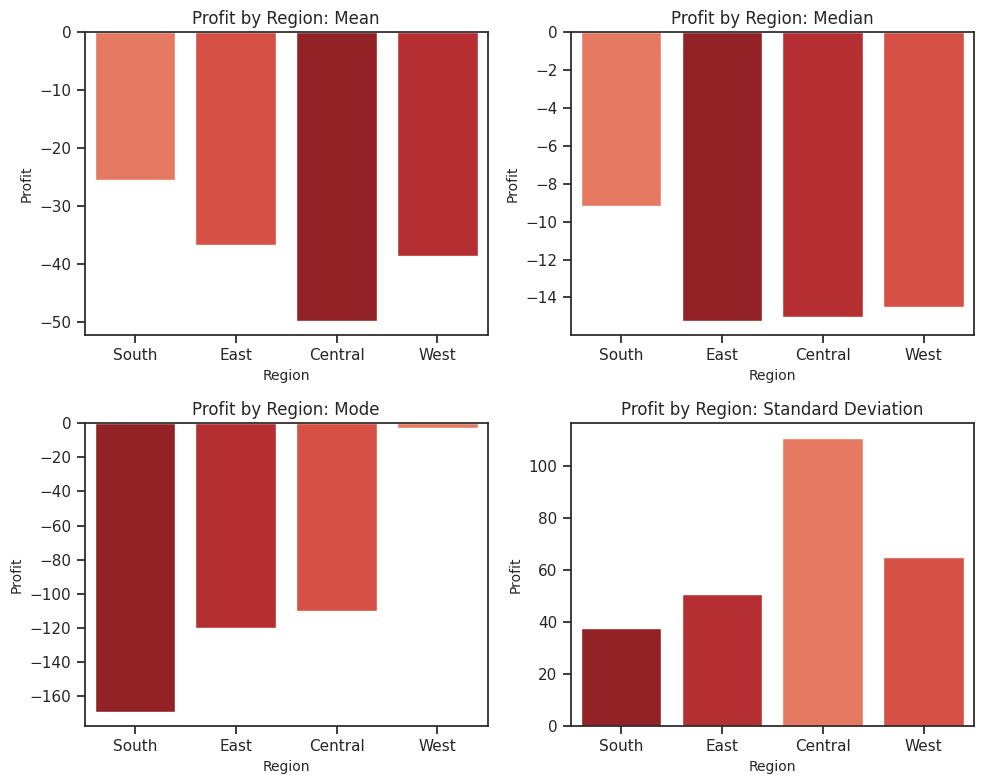

In [ ]:
# Define a subset of darker blues for cost analysis
custom_palette = sns.color_palette("Reds_r", n_colors=7)[:4]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/loss_by_region_2x2.png"

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid(
    data=summary_table_region,
    metric='Profit',
    group_by_column='Region',
    stats=summary_stats,
    title_prefix="Profit by Region: ",
    palette=custom_palette
)


# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


Figure saved as /content/loss_discount_by_region.png


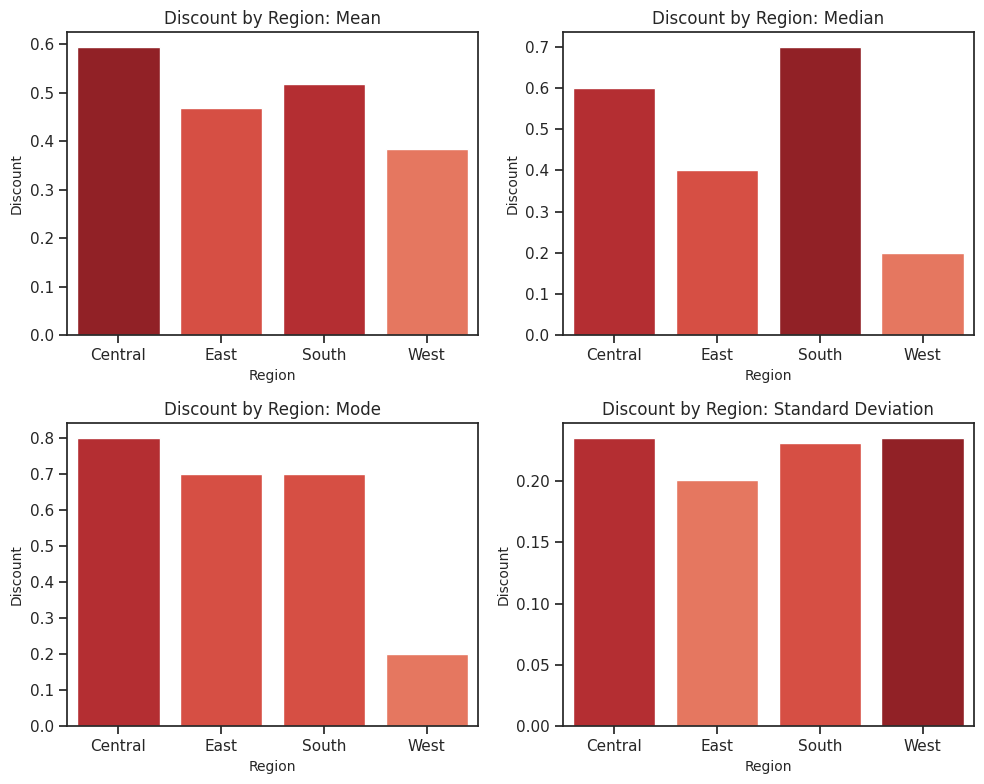

In [ ]:
# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker blues for cost analysis
custom_palette = sns.color_palette("Reds", n_colors=7)[3:]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_by_region.png"

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid(
    data=summary_table_region,
    metric='Discount',
    group_by_column='Region',
    stats=summary_stats,
    title_prefix="Discount by Region: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Regional Losses Analysis - Summary Statistics

#### **1. Central Region: Significant Discounts with High Variability**
- **Mean Profit Margin** in the Central region is extremely negative (-108.8%), with a high **Profitability Ratio** (-43.7%), indicating widespread inefficiencies.
- **Discounts** are the highest across all regions, averaging 59.5%, which likely contributes to the region’s persistent losses.
- High **Standard Deviation** in costs and profits highlights inconsistency, suggesting operational inefficiencies or erratic pricing strategies.

#### **2. East Region: Slightly Better Efficiency but Persistent Losses**
- **Mean Profit Margin** is less negative (-42.7%) compared to other regions, indicating relatively better cost-to-revenue efficiency.
- However, the **Mean Estimated Cost** is the highest across all regions, averaging $168.9, suggesting that high operational costs are driving losses despite moderate discounts (46.8%).
- **Standard Deviation** in costs and sales indicates variability, which could mask high-performing areas needing targeted focus.

#### **3. South Region: Smallest Average Losses but High Discounts**
- The South has the smallest **Mean Profit** loss (-$25.4) among all regions, but **Profit Margin** (-51.5%) and **Profitability Ratio** (-31.3%) remain poor.
- Discounts are relatively high at **51.8%**, eroding already thin margins.
- The region has the smallest **Market Share** (17.1%), suggesting that heavy discounts have not translated into increased market presence.

#### **4. West Region: Highest Market Share but Operational Inefficiencies**
- The West region has the **highest Market Share** (31.6%), but it suffers from significant inefficiencies, with a **Mean Profit Margin** of -40.2% and a **Profitability Ratio** of -23.7%.
- Discounts are the lowest among all regions at **38.4%**, but this has not been enough to mitigate losses entirely.
- **High variability** in costs and profits suggests the need for better pricing and cost control.

---

### **Actionable Recommendations**

1. **Central Region**:
   - Reduce **Discounts** aggressively and analyze the profitability of discounted sales.
   - Investigate operational inefficiencies causing high cost variability.

2. **East Region**:
   - Address high **Estimated Costs** with a detailed review of supply chain and operational expenses.
   - Focus discounts on specific, high-margin products to counteract high operational costs.

3. **South Region**:
   - Improve **Market Share** by optimizing discounts and marketing efforts to attract more customers without eroding margins.
   - Reassess discount strategies to ensure they target the right customers and product lines.

4. **West Region**:
   - Leverage high **Market Share** to reduce discounts further and focus on pricing strategies for higher-margin sales.
   - Standardize operations to minimize cost variability and inefficiencies.




## Region & State

In [ ]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])
table_profits_region_state

,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Illinois,-6415.9455,-113.092166,-46.175773,16876.9265,10460.9810,0.616935,930,495,21.819594
1,Central,Texas,-9712.3890,-106.161555,-42.157590,24717.9592,15005.5702,0.580600,1438,730,21.819594
2,East,Connecticut,-15.5826,-8.571429,-7.894737,197.3796,181.7970,0.300000,6,1,29.548188
3,East,Delaware,-37.1124,-18.571429,-15.662651,236.9484,199.8360,0.300000,6,4,29.548188
4,East,Maryland,-23.9372,-10.000000,-9.090909,263.3092,239.3720,0.300000,4,2,29.548188
5,East,New Jersey,-31.3722,-12.857143,-11.392405,275.3782,244.0060,0.300000,7,2,29.548188
6,East,New York,-1178.9400,-24.223856,-18.281266,5974.3100,4795.3700,0.335294,121,41,29.548188
7,East,Ohio,-2832.1161,-47.901120,-29.611469,11820.3921,8988.2760,0.505882,652,300,29.548188
8,East,Pennsylvania,-3951.5718,-42.996523,-27.053993,18133.5668,14181.9950,0.467257,828,355,29.548188
9,East,Rhode Island,-13.7568,-5.714286,-5.405405,254.5008,240.7440,0.300000,10,4,29.548188


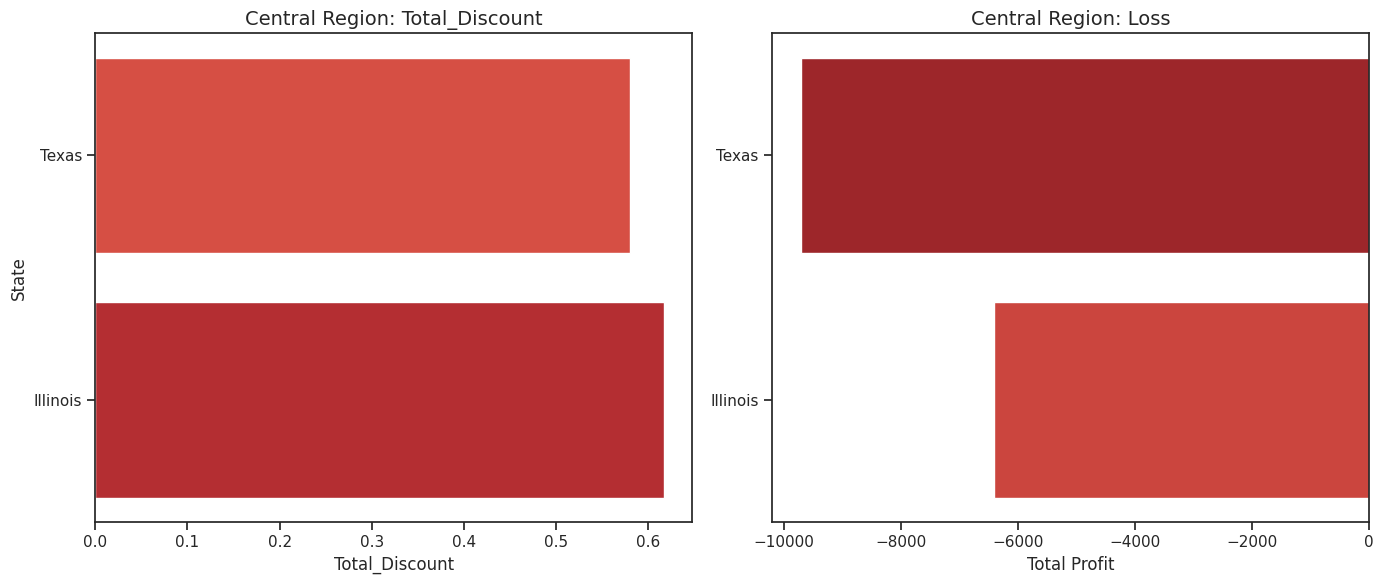

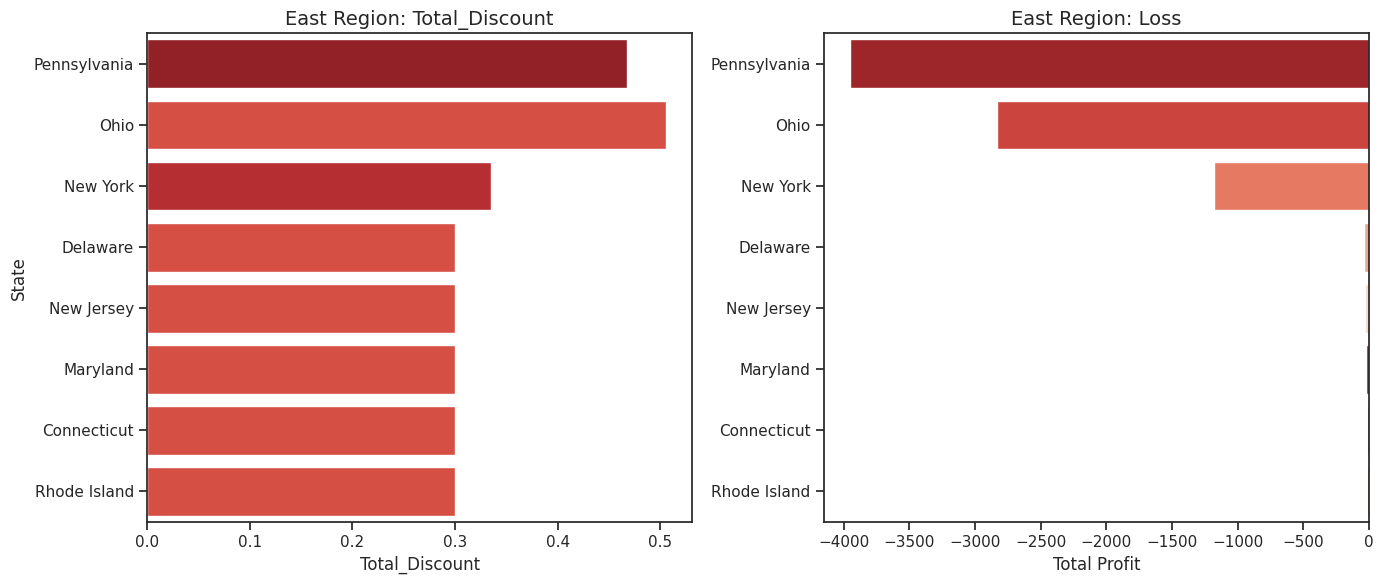

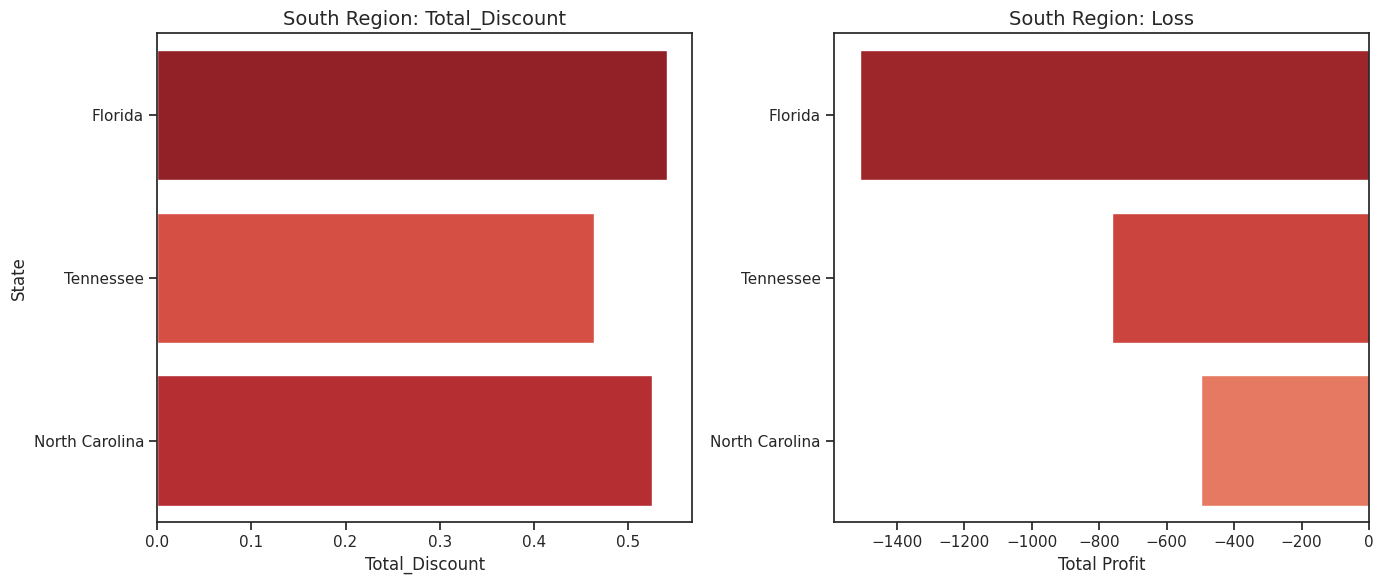

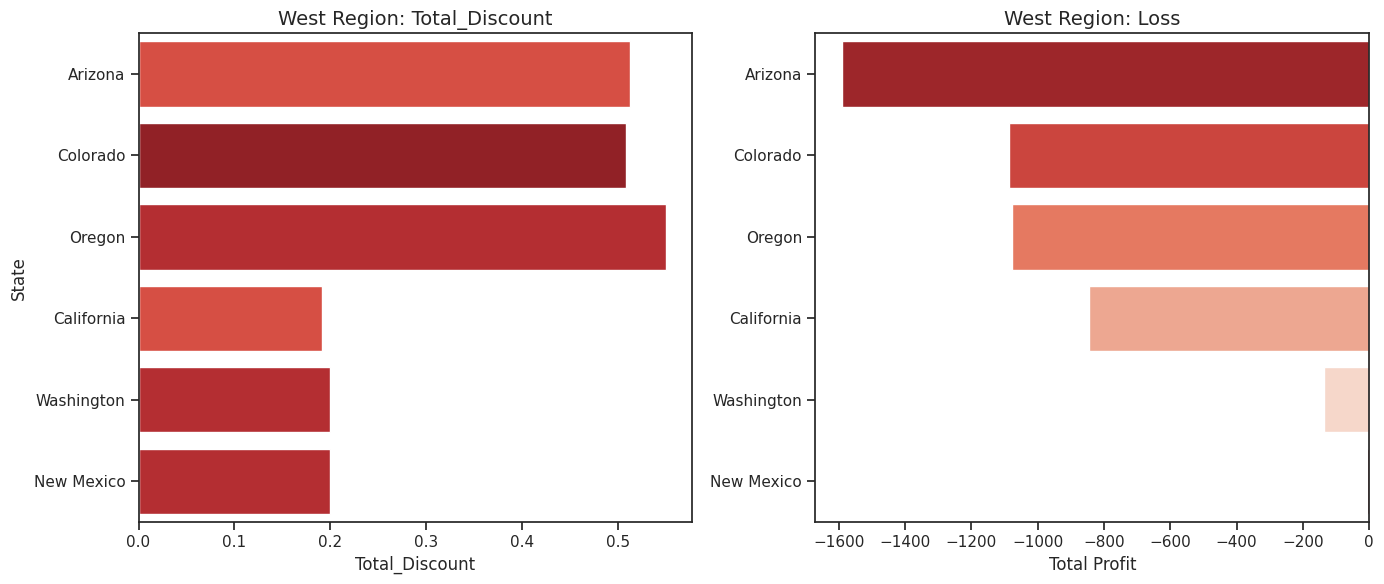

In [ ]:
regions = table_profits_region_state['Region'].unique()

# Define a subset of darker blues for cost analysis
custom_palette = sns.color_palette("Reds", n_colors=9)[1:]  # Select the darker shades

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Call the function for all regions
dvu.plot_discount_loss_grid(
    data=table_profits_region_state,
    region_column='Region',
    group_by_column='State',
    discount_column='Total_Discount',
    profit_column='Total_Profit',
    regions=regions,
    figsize=(14, 6)  # Adjust size as needed
)

### Region & State Analysis
### Analysis of Loss and Discounts by Region and State

1. **High Losses in the Central Region**:
   - **Illinois** and **Texas** show the highest losses at **-\$6,415.95** and **-\$9,712.39**, respectively. These states also have the highest discounts in the region, **0.62** (Illinois) and **0.58** (Texas), suggesting that excessive discounting is a key driver of losses.
   - Estimated costs in both states are substantial, with **\$24,717.96** in Texas and **$16,876.93** in Illinois, emphasizing inefficient spending.

2. **East Region: Moderate Losses with Low Discounts**:
   - **Pennsylvania** and **Ohio** stand out with losses of **-\$3,951.57** and **-\$2,832.12**, but their discounts are moderate at **0.47** and **0.51**, respectively.
   - **New York** shows a large loss of **-\$1,178.94**, though its lower discount level (**0.33**) indicates factors beyond discounting may be at play, such as high costs (**$5,974.31**) relative to sales.

3. **South Region: Consistent Losses and Discounts**:
   - **Florida** and **Tennessee** exhibit notable losses of **-\$1,509.94** and **-\$761.05**, with discount rates of **0.54** and **0.46**. The high discounts correlate strongly with their losses, especially in Florida, where costs (**$6,484.87**) significantly outweigh sales.

4. **West Region: Diverse Loss Patterns**:
   - **Arizona** and **California** show contrasting patterns:
     - Arizona has a significant loss (**-\$1,590.91**) with a high discount rate (**0.51**), highlighting discounting as a probable driver of losses.
     - California has a lower discount rate (**0.19**) but still incurs losses (**-\$844.10**), suggesting other cost-related inefficiencies.
   - **Oregon** and **Colorado** have high losses (**-\$1,075.89** and **-\$1,085.99**) with discount rates exceeding **0.50**, reinforcing the pattern of excessive discounting.

5. **Actionable Insights**:
   - Regions with the highest discount rates (**Central, South, West**) align with the most significant losses, underscoring the need to reevaluate discounting policies.
   - A deeper investigation into cost inefficiencies in high-loss states like Texas, Illinois, Arizona, and Florida is critical to identify opportunities for cost reduction and revenue alignment.

## Category

In [ ]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_category = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category'])
table_profits_category

,Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,-14388.3928,-35.963319,-22.256118,67026.0080,52637.6152,0.382266,2047,923,25.687639
1,Office Supplies,-15071.9634,-104.874498,-45.656145,33957.6924,18885.7290,0.643614,3024,1581,23.878809
2,Technology,-2260.7708,-20.307229,-15.567348,12591.1808,10330.4100,0.313253,662,281,27.256786


### Category Analysis

1. **Office Supplies**:
   - Largest losses of **-\$15,071.96** and an alarming **profit margin of -104.87%**, pointing to severe financial underperformance.
   - Discounts are the highest among the categories (**0.64 average discount**), likely contributing heavily to the losses.
   - Aggressive discounting is not translating to sufficient sales volume to offset losses.

2. **Furniture**:
   - High losses at **-\$14,388.39**, with a negative **profit margin of -35.96%**, indicating significant inefficiencies.
   - Discounts are moderate (**0.38 average discount**), suggesting that profitability issues may be driven more by high costs than excessive discounting.

3. **Technology**:
   - Comparatively minor losses of **-\$2,260.77**, with the smallest profit margin deficit (**-20.31%**).
   - Discounts are the lowest (**0.31 average discount**), showing better pricing discipline compared to other categories.
   - Losses here are more manageable and may be easier to address through small adjustments.

### Key Insights:
- **Office Supplies** suffers the most due to excessive discounting, which erodes profitability.
- **Furniture** faces significant losses, likely driven by operational inefficiencies rather than discounts alone.
- **Technology** demonstrates better cost and discount control, offering potential for profitability with targeted improvements.  
- Immediate focus should be on **reducing discounts in Office Supplies** and **improving efficiency in Furniture** to recover profitability.

Figure saved as /content/profit_by_category_3x3.png


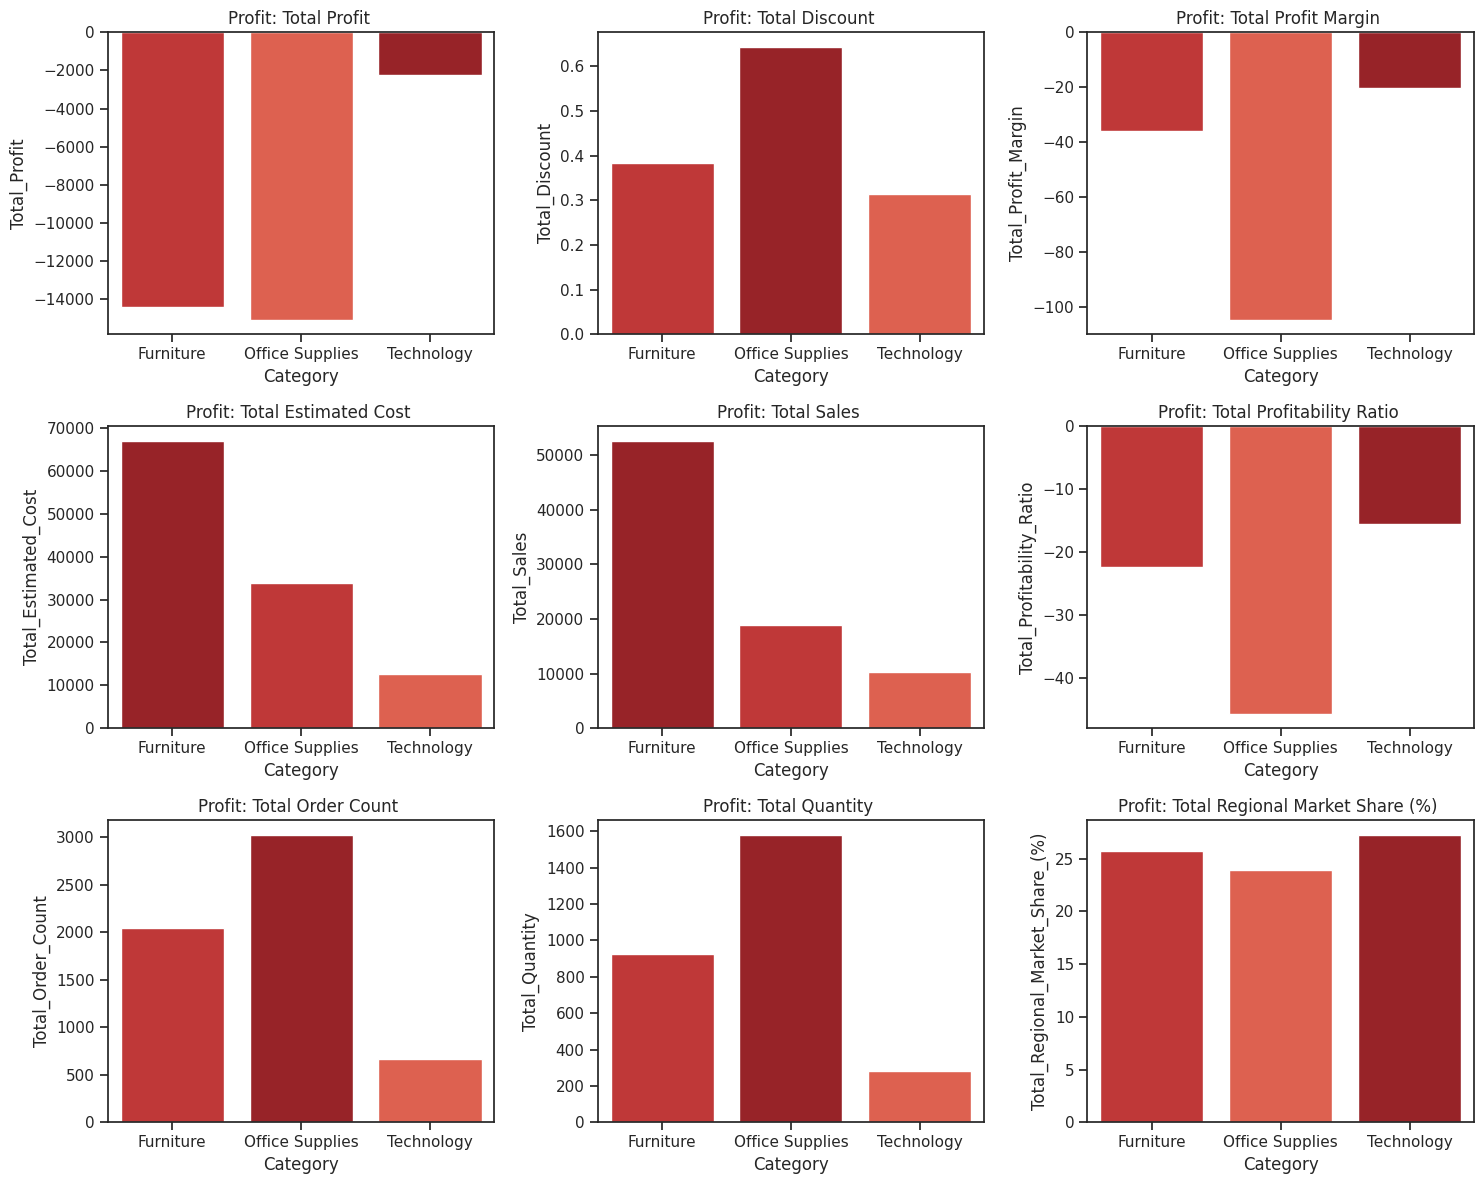

In [ ]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Discount',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_category_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[3:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_category,
    metrics=metrics,
    group_by_column='Category',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Category - Summary Statistics

In [ ]:
# Generate the summary table grouped by category
summary_table_category = dvu.summarize_metrics_by_group(df, metrics, group_column='Category')

# Display the results
print("\nSummary Table by Category:")
summary_table_category


Summary Table by Category:


,Summary_Stats,Category,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Furniture,-51.756809,-35.963319,-22.256118,241.100748,189.343940,0.382266,7.363309,3.320144,25.687639
1,Median,Furniture,-24.198300,-24.285714,-19.540230,218.798950,181.986000,0.300000,7.000000,3.000000,21.819594
2,Mode,Furniture,-2.699700,-27.142857,-40.476190,218.675700,155.372000,0.300000,7.000000,2.000000,21.819594
3,Standard Deviation,Furniture,70.089631,36.198432,16.460036,168.137950,130.207406,0.163540,2.462943,1.952973,4.914970
4,Mean,Office Supplies,-36.317984,-104.874498,-45.656145,81.825765,45.507781,0.643614,7.286747,3.809639,23.878809
5,Median,Office Supplies,-10.654700,-76.666667,-43.396226,23.160000,11.673000,0.700000,7.000000,3.000000,21.819594
6,Mode,Office Supplies,-55.256000,-76.666667,-42.307692,5.204600,64.784000,0.700000,9.000000,3.000000,21.819594
7,Standard Deviation,Office Supplies,94.577615,68.925030,17.536883,157.864640,81.121254,0.218363,2.560796,2.260756,5.013042
8,Mean,Technology,-27.238202,-20.307229,-15.567348,151.700973,124.462771,0.313253,7.975904,3.385542,27.256786
9,Median,Technology,-13.286700,-20.000000,-16.666667,88.202100,70.720000,0.200000,8.000000,3.000000,29.548188


Figure saved as /content/loss_by_category.png


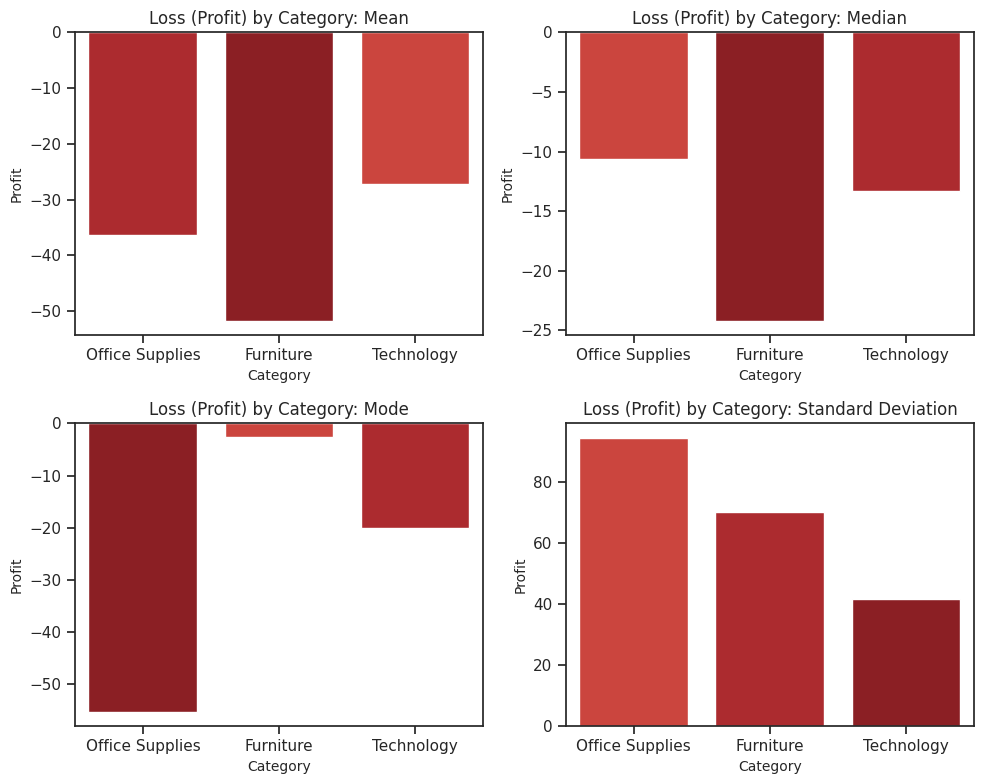

In [ ]:
# Define the summary statistics to plot
summary_stats = ["Mean", "Median", "Mode", "Standard Deviation"]

# Visualize the metrics and save the figure
save_path = "/content/loss_by_category.png"

# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Select the darker shades

# Plot for 'Profit'
dvu.plot_summary_stats_grid(
    data=summary_table_category,
    metric='Profit',
    group_by_column='Category',
    stats=summary_stats,
    title_prefix="Loss (Profit) by Category: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

Figure saved as /content/discount_by_category.png


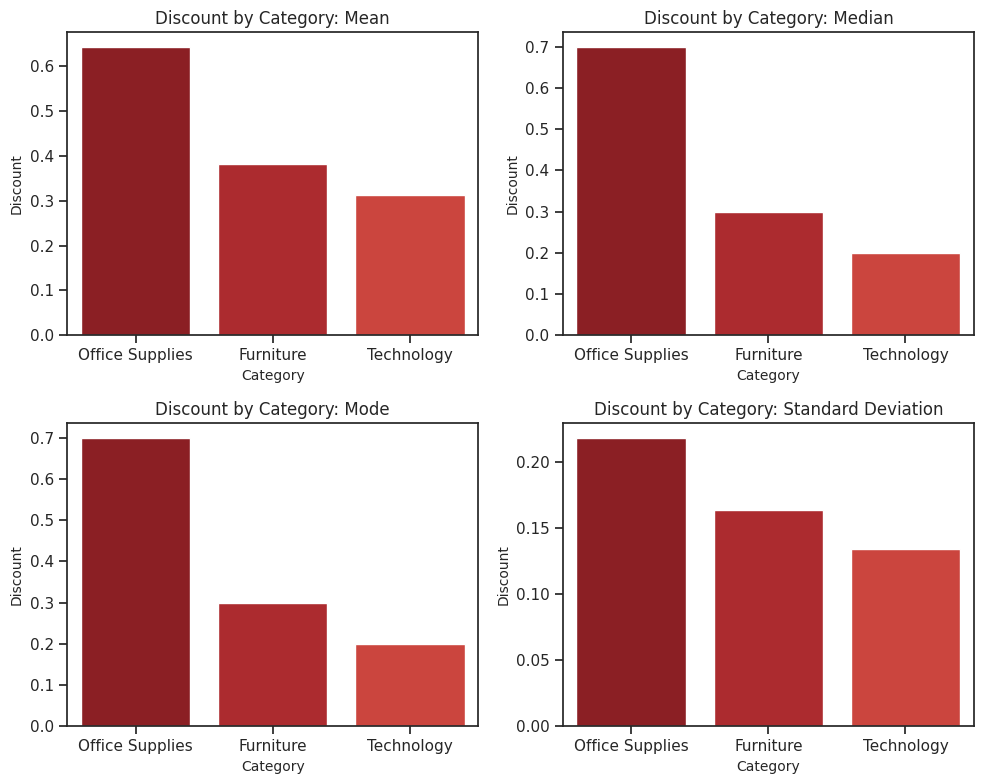

In [ ]:
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds", n_colors=8)[5:]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_by_category.png"

# Plot for 'Discount'
dvu.plot_summary_stats_grid(
    data=summary_table_category,
    metric='Discount',
    group_by_column='Category',
    stats=summary_stats,
    title_prefix="Discount by Category: ",
    palette=custom_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


### Category Analysis - Summary Statistics

1. **Furniture**:
   - **Key Issue**: Average losses in Furniture are significant, with a mean profit of **-51.76** and a high variability (Standard Deviation: **70.09**).
   - **Profit Margin**: The mean profit margin is **-35.96%**, indicating a major inefficiency in cost-to-sales conversion.
   - **Actionable Insight**: Focus on addressing inefficiencies in Furnishings and Tables, as these sub-categories likely contribute heavily to losses.
   - **Sales Performance**: Sales figures are higher compared to Office Supplies, indicating demand but poor profitability.

2. **Office Supplies**:
   - **Key Issue**: This category shows the **largest negative profit margin**, with a mean margin of **-104.87%**, and a mean profitability ratio of **-45.66%**.
   - **Discount Dependency**: Discounts are notably high at a mean of **64.36%**, likely driving losses.
   - **Actionable Insight**: Reassess discounting policies and pricing strategies, particularly for Binders and Appliances. Limit deep discounts to improve margins.

3. **Technology**:
   - **Better Positioning**: Technology shows the **lowest average losses** (**-27.23**) and a less negative profit margin (**-20.30%**) compared to the other categories.
   - **Opportunities**: This category has the **highest regional market share** at **27.25%**, signaling strong customer demand.
   - **Actionable Insight**: Invest in Technology as a key growth driver. Reduce inefficiencies in Phones and Accessories sub-categories to further improve profitability.

4. **Discount Trends**:
   - Office Supplies heavily relies on discounts, with a median of **70%**. This is significantly higher than Furniture (**30%**) and Technology (**20%**), impacting profitability.
   - **Actionable Insight**: Develop a balanced discount strategy tailored to customer behavior and sub-category performance.

5. **Sales Variability**:
   - Furniture has the **highest variability** in sales (Standard Deviation: **130.21**), suggesting inconsistent demand across sub-categories.
   - **Actionable Insight**: Focus on stabilizing demand through targeted promotions or inventory management.

6. **Profitability Ratio**:
   - Across all categories, profitability ratios are negative, but Technology performs relatively better (**-15.57%** mean) compared to Office Supplies (**-45.66%**) and Furniture (**-22.26%**).
   - **Actionable Insight**: Leverage the strong performance of Technology and optimize pricing strategies in other categories to improve overall profitability.

### Overall Recommendations:
- **Strategic Focus**: Prioritize Technology as the most promising category while addressing inefficiencies in Office Supplies and Furniture.
- **Discount Management**: Implement strict guidelines for discounts, especially in Office Supplies, to reduce profit erosion.
- **Targeted Interventions**: Analyze specific sub-categories (e.g., Furnishings, Binders) contributing to losses and implement corrective actions such as revising pricing, renegotiating supplier contracts, or optimizing inventory.




# Sub-Category


In [ ]:
# Grouping the data by Category and Sub-Category to calculate totals
summary_table = df.groupby(['Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Discount': 'sum'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category= summary_table.sort_values(by='Profit', ascending=True)
summary_table_category

,Category,Sub-Category,Profit,Discount
5,Office Supplies,Binders,-7769.3608,221.10
4,Office Supplies,Appliances,-5417.5448,30.40
3,Furniture,Tables,-5216.6757,25.10
2,Furniture,Furnishings,-3537.0358,43.60
1,Furniture,Chairs,-2867.6431,24.40
0,Furniture,Bookcases,-2767.0382,13.17
7,Office Supplies,Storage,-1653.5869,11.80
11,Technology,Phones,-1534.0615,16.20
10,Technology,Machines,-464.6674,3.80
9,Technology,Accessories,-262.0419,6.00


In [ ]:
# Filter and reset categories for each subset of data
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table.loc[:, 'Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table.loc[:, 'Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)

# Metrics to analyze
metrics = ['Profit', 'Discount']

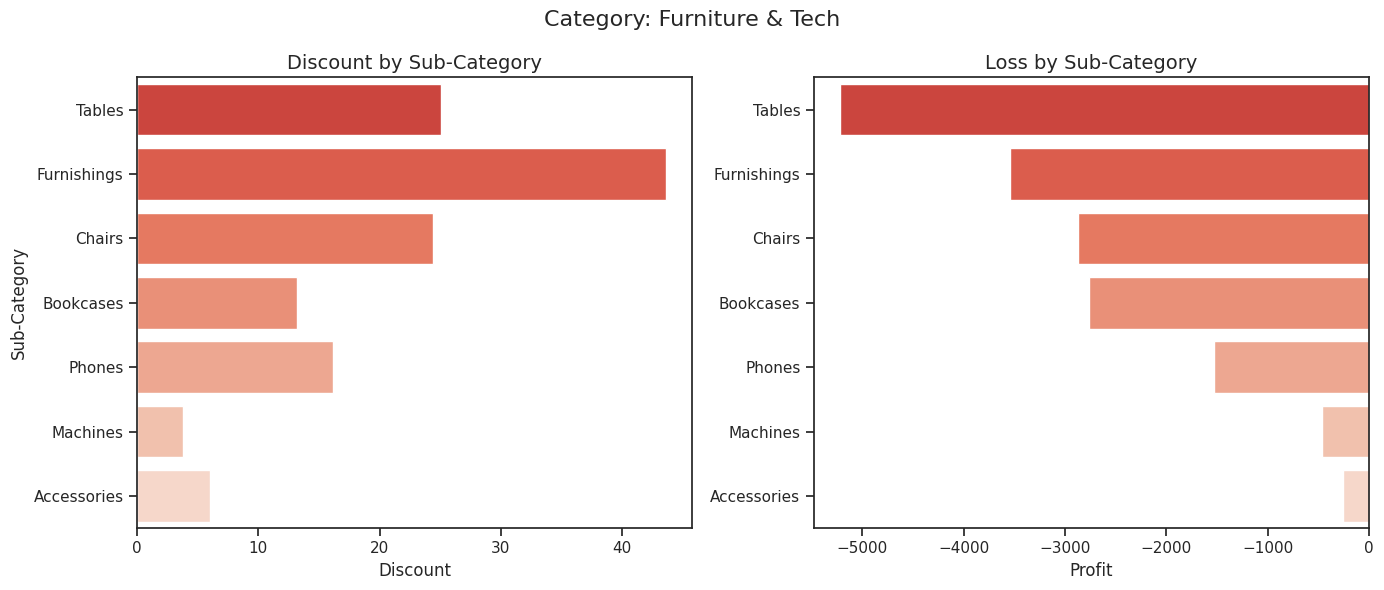

In [ ]:
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds_r", n_colors=11)[3:]  # Select the darker shades

plot_category_subcategory_loss_grid(
    data=ft_table_sorted,
    category_column='Category',
    sub_category_column='Sub-Category',
    discount_column='Discount',
    profit_column='Profit',
    palette=loss_palette,
    title='Furniture & Tech'
)

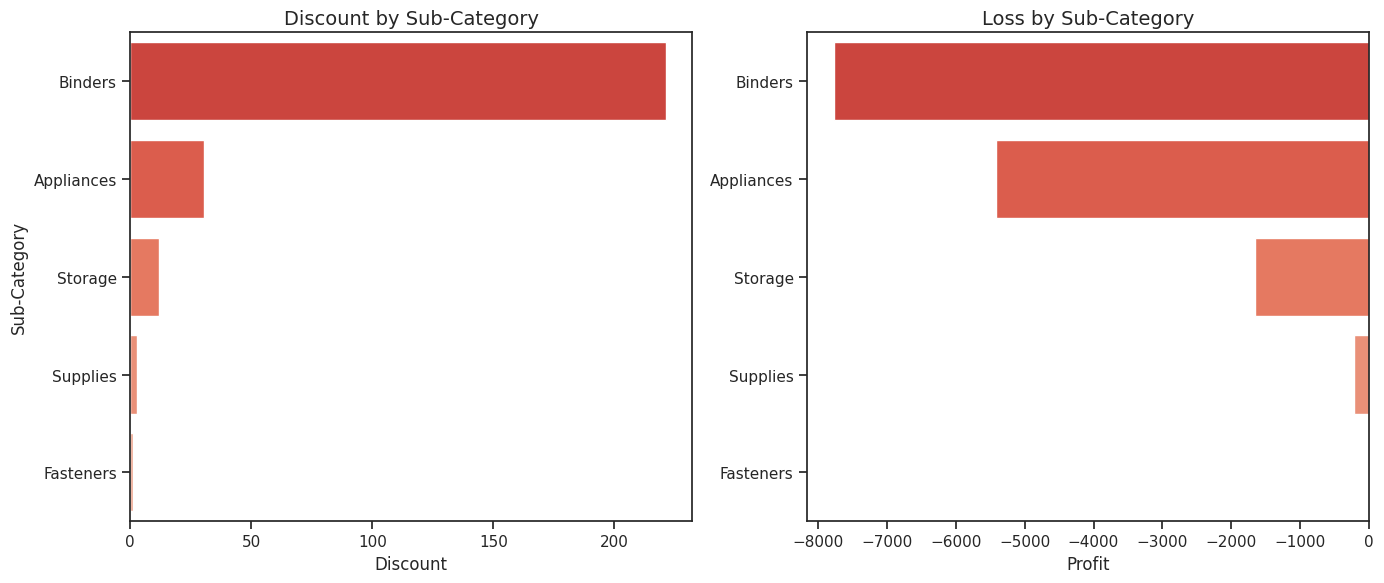

In [ ]:
dvu.plot_category_subcategory_loss_grid(
    data=office_table_sorted,
    category_column='Category',
    sub_category_column='Sub-Category',
    discount_column='Discount',
    profit_column='Profit',
    palette=loss_palette,
    title='Office Supplies'
)

### Sub-Category Loss Discount Analysis


1. **Top Loss Drivers:**
   - **Binders** (Office Supplies) shows the largest loss at **-\$7769.36** with a high cumulative discount of **221.10**, indicating a significant role of discounts in driving losses.
   - **Appliances** (Office Supplies) and **Tables** (Furniture) are also major loss contributors, with profits of **-\$5417.54** and **-\$5216.67** and discounts of **30.40** and **25.10**, respectively.

2. **Furniture Impact:**
   - Furniture sub-categories (**Chairs**, **Bookcases**, **Furnishings**, and **Tables**) collectively exhibit high losses, accounting for over **-\$14,388.39** in total. Discounts in this category vary widely, with **Furnishings** and **Chairs** having higher cumulative discounts (**43.60** and **24.40**, respectively), which may indicate promotional inefficiencies.

3. **Discount Proportions:**
   - High discounts are not always correlated with the largest losses. For instance, **Binders** has the highest discount and loss, while **Appliances** and **Tables** have smaller discounts relative to their losses, suggesting other factors like pricing or sales volume might be contributing.

4. **Technology Category Observations:**
   - Losses in Technology are relatively smaller, with **Phones** having a loss of **-1534.06** and a discount of **16.20**. **Machines** and **Accessories** show even smaller losses and discounts, with **Machines** having the lowest discount (**3.80**) among significant items.

5. **Minor Loss Drivers:**
   - Sub-categories like **Fasteners** and **Supplies** exhibit minimal losses (**-18.27** and **-213.20**) with correspondingly small discounts (**1.00** and **2.80**), indicating limited financial impact.



## Sub-Category - Summary Statistics

In [ ]:
# Generate the summary table grouped by Category and Sub-Category
summary_table_category = dvu.summarize_metrics_by_group_multi(
    data=df,
    metrics=metrics,
    group_columns=['Category', 'Sub-Category']
)

# Display the results
print("\nSummary Table by Category & Sub-Category:")
summary_table_category


Summary Table by Category & Sub-Category:


,Summary_Stats,Category,Sub-Category,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Furniture,Bookcases,-74.784816,-44.553127,-22.460531,308.209849,233.425032,3.559459e-01,7.243243,3.135135,2.703124e+01
1,Median,Furniture,Bookcases,-29.605800,-12.500000,-11.111111,286.544400,209.979000,3.200000e-01,7.000000,3.000000,2.954819e+01
2,Mode,Furniture,Bookcases,-29.605800,-8.235294,-7.608696,220.046400,359.499000,2.000000e-01,6.000000,2.000000,3.158008e+01
3,Standard Deviation,Furniture,Bookcases,98.871540,58.920841,21.828542,133.060695,103.999322,1.946572e-01,2.314272,1.873235,5.221381e+00
4,Mean,Furniture,Chairs,-30.185717,-12.829156,-10.778685,269.823327,239.637611,2.568421e-01,7.421053,3.389474,2.671832e+01
5,Median,Furniture,Chairs,-22.138200,-11.250000,-10.112360,237.457800,215.976000,3.000000e-01,7.000000,3.000000,2.954819e+01
6,Mode,Furniture,Chairs,-2.699700,-27.142857,-10.112360,218.675700,155.372000,3.000000e-01,7.000000,2.000000,3.158008e+01
7,Standard Deviation,Furniture,Chairs,28.483089,9.428474,7.175131,133.964684,118.146060,5.188496e-02,2.469296,2.145231,5.061700e+00
8,Mean,Furniture,Furnishings,-44.212947,-61.812500,-35.428430,114.082298,69.869350,5.450000e-01,7.500000,3.875000,2.262067e+01
9,Median,Furniture,Furnishings,-14.328600,-60.000000,-37.500000,45.307200,27.756000,6.000000e-01,7.500000,3.000000,2.181959e+01


### Sub-Category Plots - Summary Statistics

Figure saved as /content/loss_discount_subcategory.png


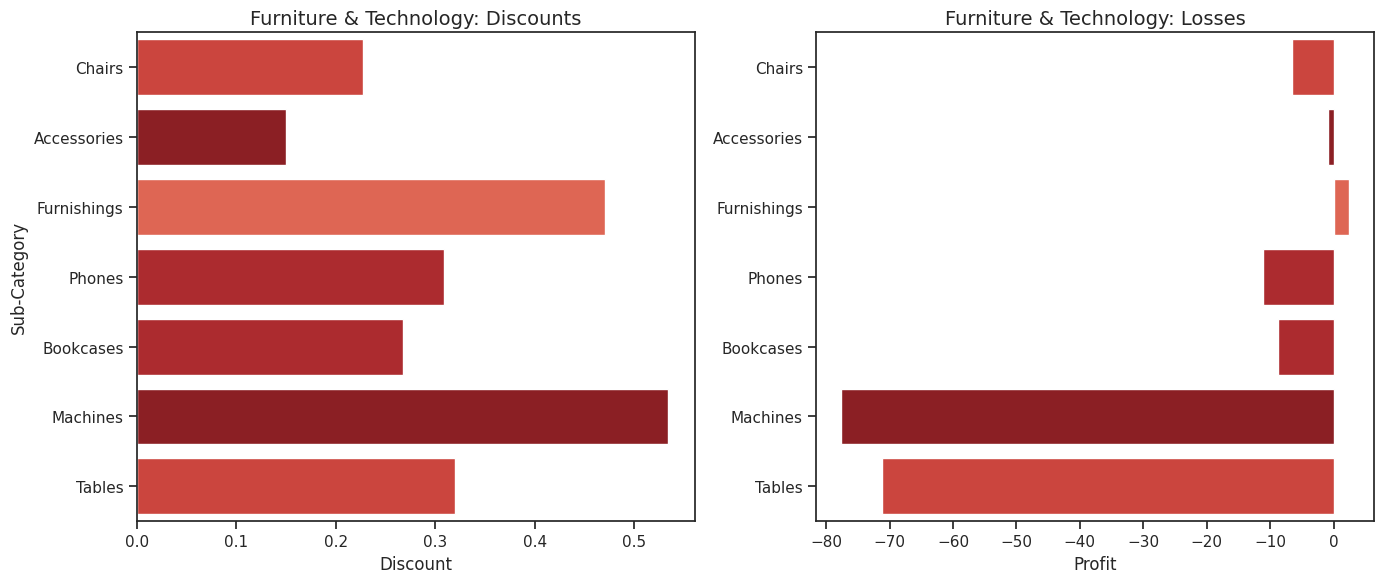

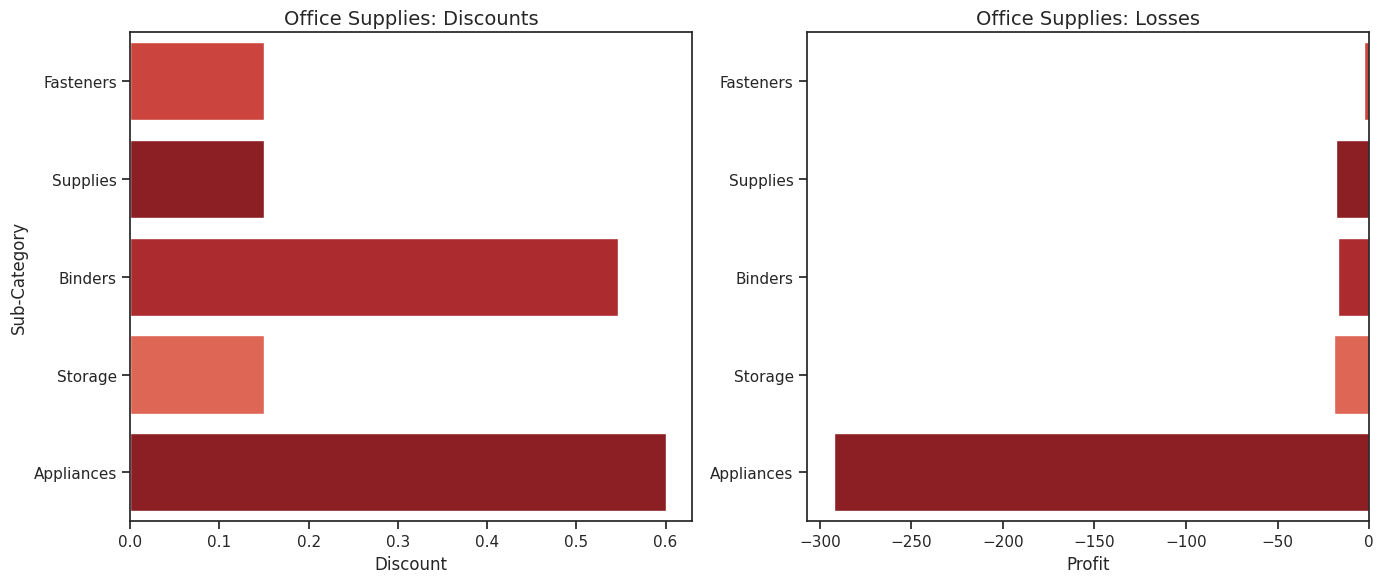

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Filter and reset categories for each subset of data
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table.loc[:, 'Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table.loc[:, 'Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=False).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Metrics to analyze
metrics = ['Profit', 'Discount']

# Visualize the metrics and save the figure
save_path = "/content/loss_discount_subcategory_furniture_tech.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=10)[0:7]  # Select the darker shades

# Call the function for Furniture & Technology and Office Supplies
dvu.plot_metrics_grid_4(
    data1=ft_table_sorted,
    data2=office_table_sorted,
    discount_column="Discount",
    loss_column="Profit",
    group_by_column="Sub-Category",
    title1="Furniture & Technology",
    title2="Office Supplies",
    palette=custom_palette,
    figsize=(14, 6)
)


# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")



### Loss by Sub-Category Analysis

#### **Big Picture Summary**:
1. **High Discount Categories Drive Losses**:
   - Sub-categories like **Appliances** (Office Supplies) and **Machines** (Technology) show extremely high discount rates (e.g., Appliances: 80%) that correspond to large negative profit margins and profitability ratios.
   - Discounts in the **Furniture** and **Office Supplies** categories are less extreme but still contribute significantly to losses, particularly in **Tables** and **Binders**.

2. **Sub-Categories with Systemic Issues**:
   - **Appliances** has the most consistent negative performance across all metrics, with high discounts leading to substantial losses.
   - **Tables** in Furniture and **Machines** in Technology also demonstrate persistently poor performance, with high variability in losses and no clear recovery even in median cases.

3. **Profit Margins and Ratios Are Negative Across the Board**:
   - Margins are heavily negative across all sub-categories, highlighting inefficiencies in cost-to-sales conversion.
   - Categories like **Furniture (Furnishings)** and **Office Supplies (Binders)** display some of the most severe inefficiencies, with profitability ratios frequently below -35%.

4. **High Variability**:
   - Sub-categories such as **Appliances** and **Machines** have wide swings in their losses (high standard deviation), indicating unpredictable performance, possibly influenced by inconsistent discount policies.

#### **Category-Level Insights**:
1. **Furniture**:
   - Sub-categories like **Tables** and **Bookcases** are persistently unprofitable, with median and mode values far into the negative range.
   - Chairs perform better overall but still struggle with smaller negative profit margins and profitability ratios.

2. **Office Supplies**:
   - **Appliances** and **Binders** are critical loss drivers, with very high discounts reducing profitability.
   - **Storage** and **Fasteners** are less impactful but still underperform consistently.

3. **Technology**:
   - **Machines** and **Phones** show significant losses, with **Machines** facing the highest variability and consistent poor outcomes.
   - **Accessories** and **Phones** appear closer to the break-even point but remain unprofitable.

#### **Recommendations for Action**:
1. **Reevaluate Discount Strategies**:
   - Focus on limiting discounts in **Appliances**, **Machines**, and **Binders**, which show the largest negative impact on profitability.
   - Implement stricter discount policies for consistently underperforming sub-categories like **Tables** and **Bookcases**.

2. **Review Cost Structures**:
   - Investigate cost inefficiencies in categories with extremely low profitability ratios, such as **Furnishings** and **Appliances**.

3. **Target Strategic Adjustments by Category**:
   - Explore alternative pricing or product bundling strategies in **Office Supplies (Binders)** and **Furniture (Tables)**.
   - Focus marketing and sales efforts on better-performing sub-categories like **Accessories** and **Storage** to offset losses.

4. **Monitor Variability**:
   - Conduct deeper analysis into categories with high standard deviation in performance (e.g., **Machines**, **Appliances**) to understand and stabilize factors influencing their losses.




## Region, Category, Sub-Category

In [10]:
# Grouping the data by Category, Sub-Category, and Region
summary_table = df.groupby(['Region', 'Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Estimated Cost': 'sum',
    'Discount': 'sum'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category = summary_table.sort_values(by='Profit', ascending=True)

# Separate data for categories
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table['Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table['Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
# print furniture table
ft_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Furniture,Furnishings,-3358.6064,7028.8824,41.40
1,East,Furniture,Tables,-1983.7433,8908.6883,9.90
2,West,Furniture,Bookcases,-1493.2825,4443.8775,5.25
3,West,Furniture,Tables,-1484.7722,5650.5172,6.80
4,East,Technology,Phones,-1374.9693,7916.0433,13.60
5,Central,Furniture,Chairs,-1032.5475,8409.4065,9.00
6,Central,Furniture,Tables,-973.0478,3745.4088,5.40
7,East,Furniture,Bookcases,-952.8625,3585.7125,4.30
8,East,Furniture,Chairs,-775.2814,6441.9314,7.60
9,South,Furniture,Tables,-775.1124,2557.8294,3.00


### Furniture Technology by Region Analysis by Loss and Discount:

1. **Significant Losses in Central and East Regions for Furniture:**
   - **Furnishings (-\$3358.61, 41.4%)** in the **Central region** has the highest discount rate in the dataset, indicating aggressive discounting as a likely cause of losses.
   - **Tables (-\$1983.74, 9.9%)** in the **East region** has high costs (**\$8908.69**) coupled with moderate discounts, suggesting potential inefficiencies in cost control.

2. **Moderate Losses in Technology Phones Across Regions:**
   - **Phones (-\$1374.97)** in the **East region** show high costs (**7916.04**) and moderate discounts (**13.6%**), highlighting pricing challenges.
   - Losses in Phones are also present in the **West (-\$109.39)** and **South (-28.13)** regions but with lower costs and minimal discounts.

3. **Chairs Show Consistent Losses in Furniture:**
   - **Chairs** in the **Central (-\$1032.55, 9%)** and **West (-\$771.73, 6.2%)** regions demonstrate notable losses despite lower discounts compared to Furnishings. Costs remain high, such as **8409.41** in the Central region, signaling potential inventory or demand issues.

4. **Technology Accessories Have Low Losses but Widespread Discounts:**
   - Losses in **Accessories** appear across regions but with varying costs and discounts, such as **Central (-82.64, 2.4%)** and **South (-80.14, 0.8%)**. These low percentages suggest opportunities for margin improvement with minimal cost adjustments.

5. **Smaller Losses in Technology Machines Across Regions:**
   - Losses for **Machines (-414.86, 2.1%)** in the **East** and **(-45.99, 0.7%)** in the **West** regions are tied to low discounts and costs, indicating they are less problematic compared to other sub-categories.



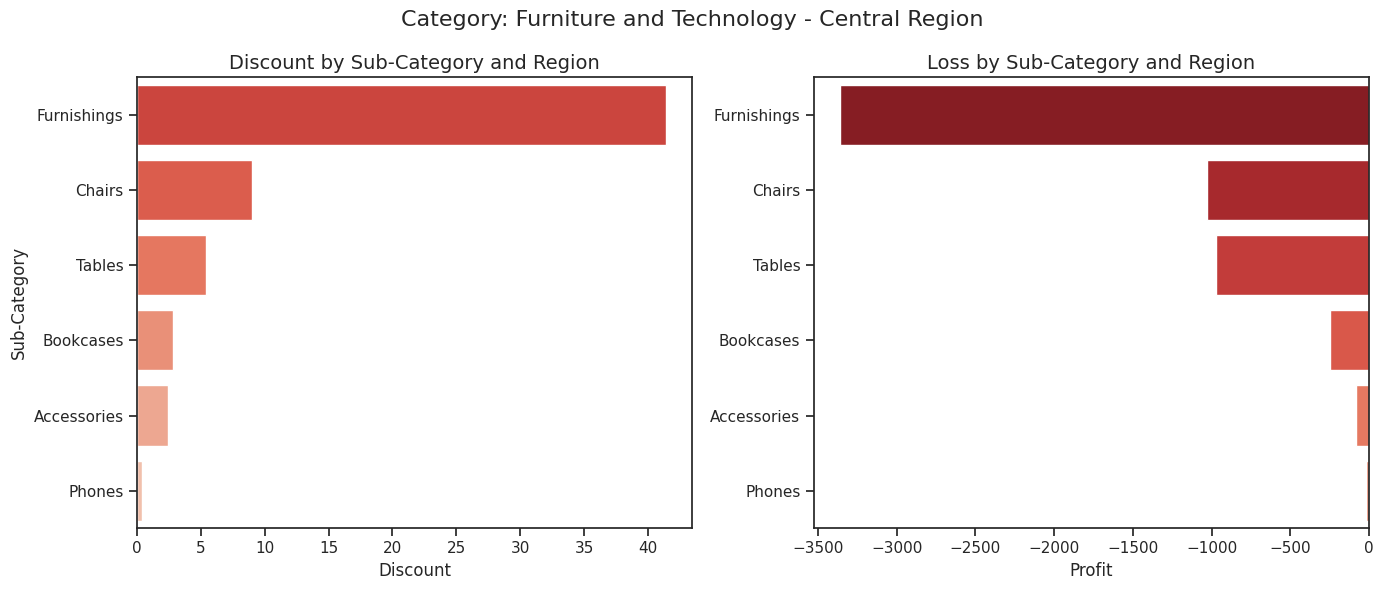

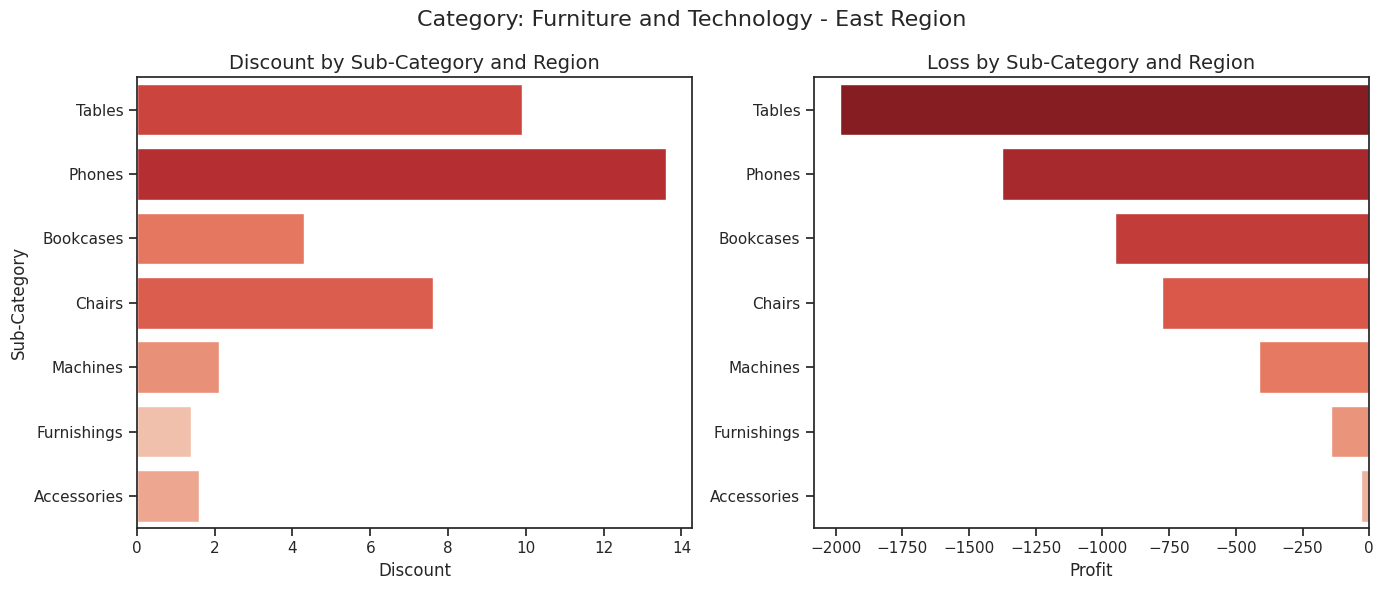

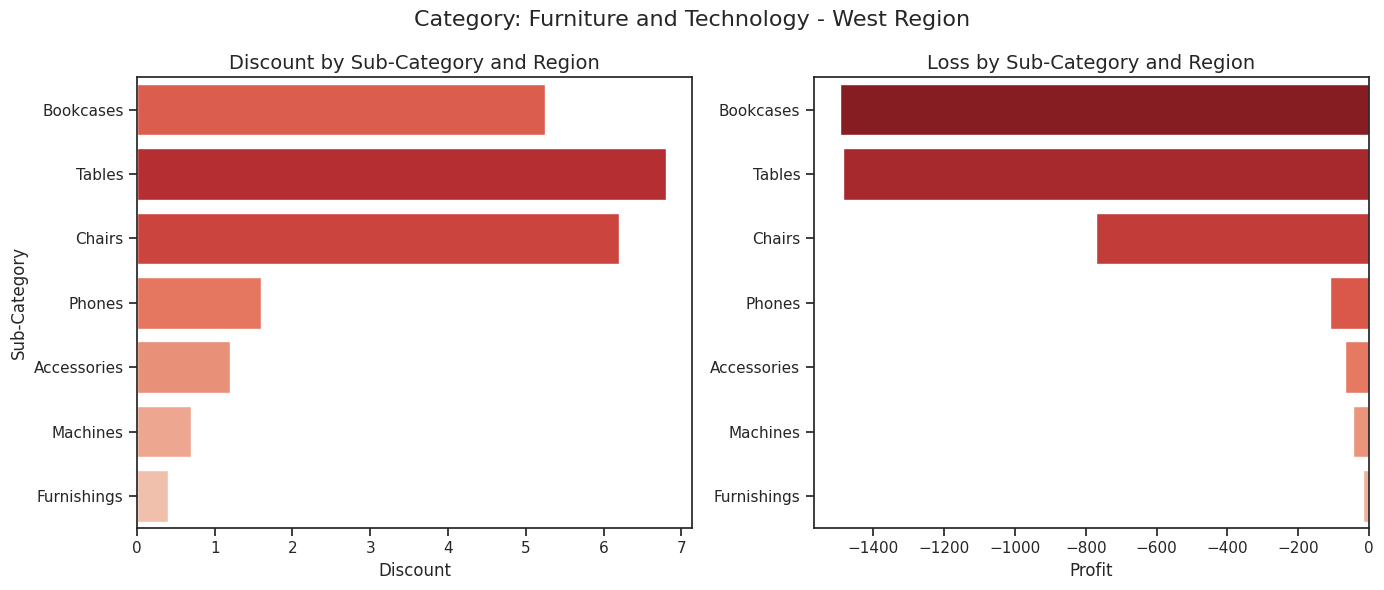

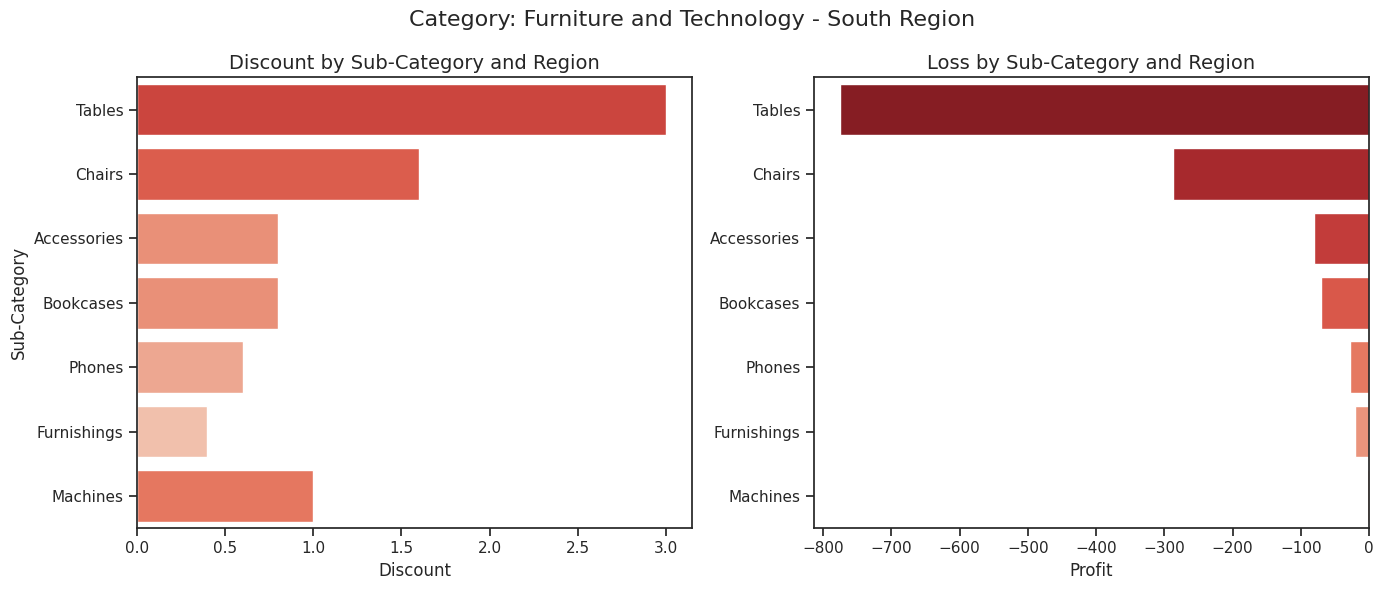

In [ ]:
def plot_category_subcategory_loss_grid_with_region(data, category_column, sub_category_column, region_column,
                                                    discount_column, profit_column, title='Category:',
                                                    palette='Reds', figsize=(14, 6)):
    """
    Plots discount and profit side by side for each sub-category grouped by category and region.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        category_column (str): Column name for category.
        sub_category_column (str): Column name for sub-category.
        region_column (str): Column name for region.
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    # Set up the grid for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Sort the data by profit to determine the order
    data_sorted = data.sort_values(by=profit_column, ascending=True)

    # custom palettes
    custom_palette_1 = sns.color_palette("Reds", n_colors=11)[-9:]
    custom_palette_2 = sns.color_palette("Reds_r", n_colors=9)[0:]


    # Plot Discount
    sns.barplot(
        data=data_sorted,
        x=discount_column,
        y=sub_category_column, order=data_sorted[sub_category_column],
        hue=data_sorted[discount_column], palette=custom_palette_1, legend=False, dodge=False,
        ax=axes[0]
    )
    axes[0].set_title("Discount by Sub-Category and Region", fontsize=14)
    axes[0].set_xlabel(discount_column, fontsize=12)
    axes[0].set_ylabel(sub_category_column.replace('_', ' '), fontsize=12)

    # Plot Profit
    sns.barplot(
        data=data_sorted,
        x=profit_column,
        y=sub_category_column, order=data_sorted[sub_category_column], ci=False,
        hue=data_sorted[profit_column], palette=custom_palette_2, legend=False, dodge=False,
        ax=axes[1]
    )
    axes[1].set_title("Loss by Sub-Category and Region", fontsize=14)
    axes[1].set_xlabel(profit_column, fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout
    plt.suptitle(f"Category: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()



# Loop through regions and plot for each
regions = df['Region'].unique()

for r in regions:
    # Filter data for the current region
    ft_table_region = ft_table_sorted[ft_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    plot_category_subcategory_loss_grid_with_region(
        data=ft_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Discount',  # Fixed missing quote
        profit_column='Profit',
        title=f"Furniture and Technology - {r} Region"
    )

In [11]:
office_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Office Supplies,Appliances,-5417.5448,7565.0128,30.4
1,Central,Office Supplies,Binders,-4203.2011,6771.5551,94.4
2,East,Office Supplies,Binders,-1828.9757,4267.5467,58.1
3,South,Office Supplies,Binders,-1250.7998,2957.9258,45.5
4,Central,Office Supplies,Storage,-735.1298,4525.5138,5.0
5,West,Office Supplies,Binders,-486.3842,1167.2342,23.1
6,East,Office Supplies,Storage,-427.4350,2419.0110,3.4
7,West,Office Supplies,Storage,-247.5397,1467.2597,1.2
8,South,Office Supplies,Storage,-243.4824,1497.7224,2.2
9,East,Office Supplies,Supplies,-152.3524,851.8004,1.0


### Office Supplies by Region Analysis by Loss and Discount:

1. **Significant Losses in Central Region with High Discounts:**
   - **Appliances (-\$5417.54, 30.4%)** and **Binders (-\$4203.20, 94.4%)** in the Central region represent the largest losses in Office Supplies, driven by extremely high discounts. These sub-categories indicate poor pricing strategies or over-discounting.
   - **Storage (-\$735.13, 5.0%)** in the Central region has relatively low discounts but still incurs significant losses, suggesting inefficiencies in cost management.

2. **Binders Consistently Show High Losses Across Regions:**
   - In the **East (-\$1828.98, 58.1%)** and **South (-\$1250.80, 45.5%)**, Binders exhibit substantial losses due to high discount rates. Despite lower discounts in the **West (-486.38, 23.1%)**, Binders still incur losses, highlighting widespread issues with this sub-category.

3. **Storage and Supplies Have Smaller Losses but Vary by Region:**
   - Losses for **Storage** are moderate in the **East (-427.44, 3.4%)**, **South (-243.48, 2.2%)**, and **West (-247.54, 1.2%)** regions, with low discount rates suggesting potential inefficiencies in handling or demand forecasting.
   - **Supplies** have smaller losses overall, with minimal discounts across regions, such as **Central (-48.49, 1.0%)** and **West (-4.18, 0.2%)**, indicating manageable but underperforming products.

4. **Minimal Losses in Fasteners Across Regions:**
   - Fasteners in the **West (-13.38, 0.6%)** and **Central (-4.89, 0.4%)** regions show negligible losses, suggesting they are not a major concern but may benefit from slight pricing adjustments.

### Key Areas for Focus:
- **Central Appliances and Binders**: Review discount policies and pricing strategies to mitigate extreme losses.
- **Binders in East and South**: Explore alternative pricing models or cost reductions for high-discount regions.
- **Storage Across Regions**: Investigate demand and operational inefficiencies contributing to losses despite low discounts.

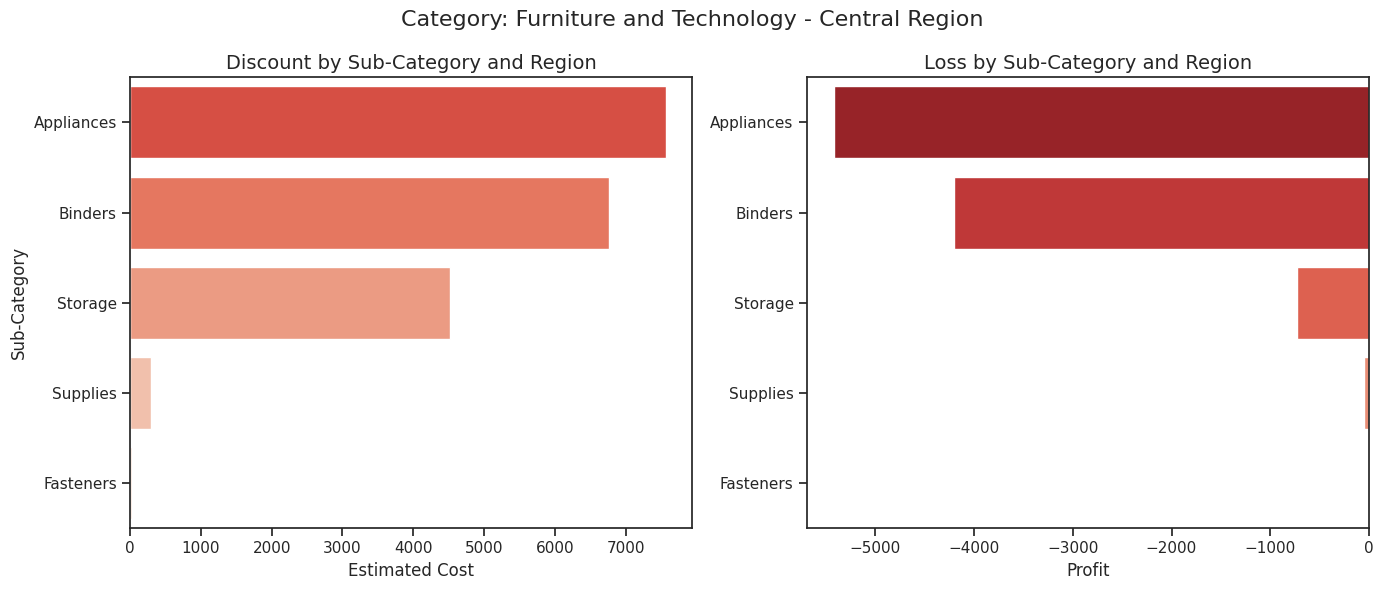

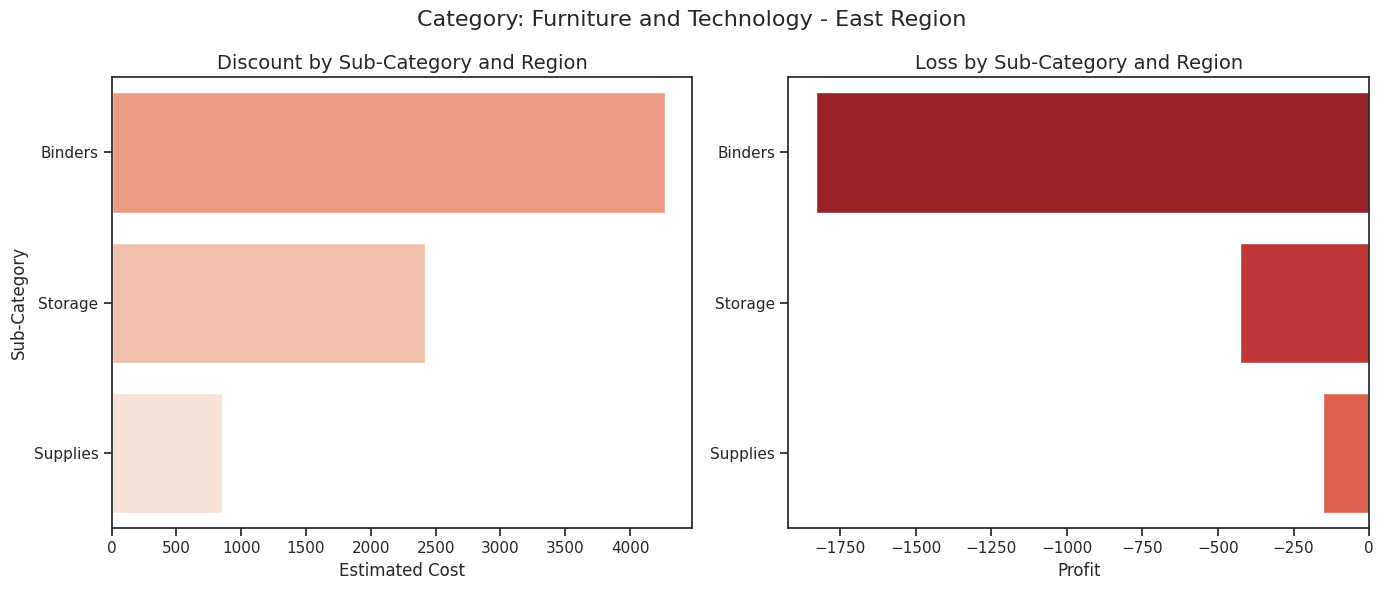

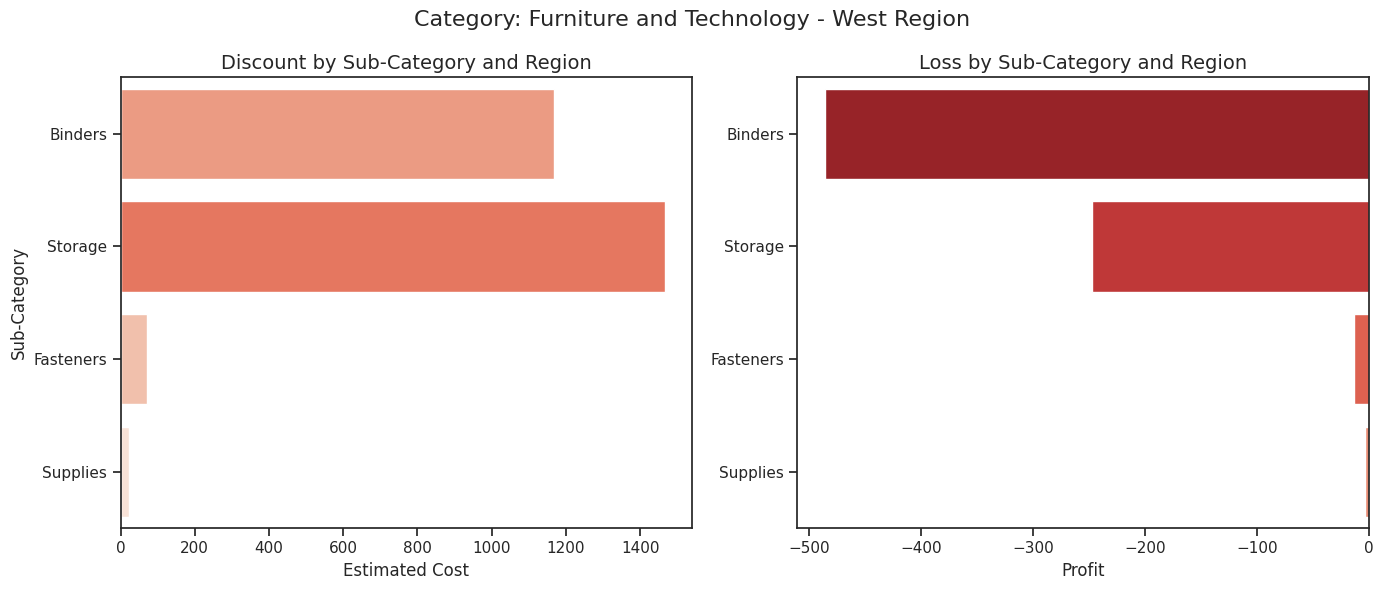

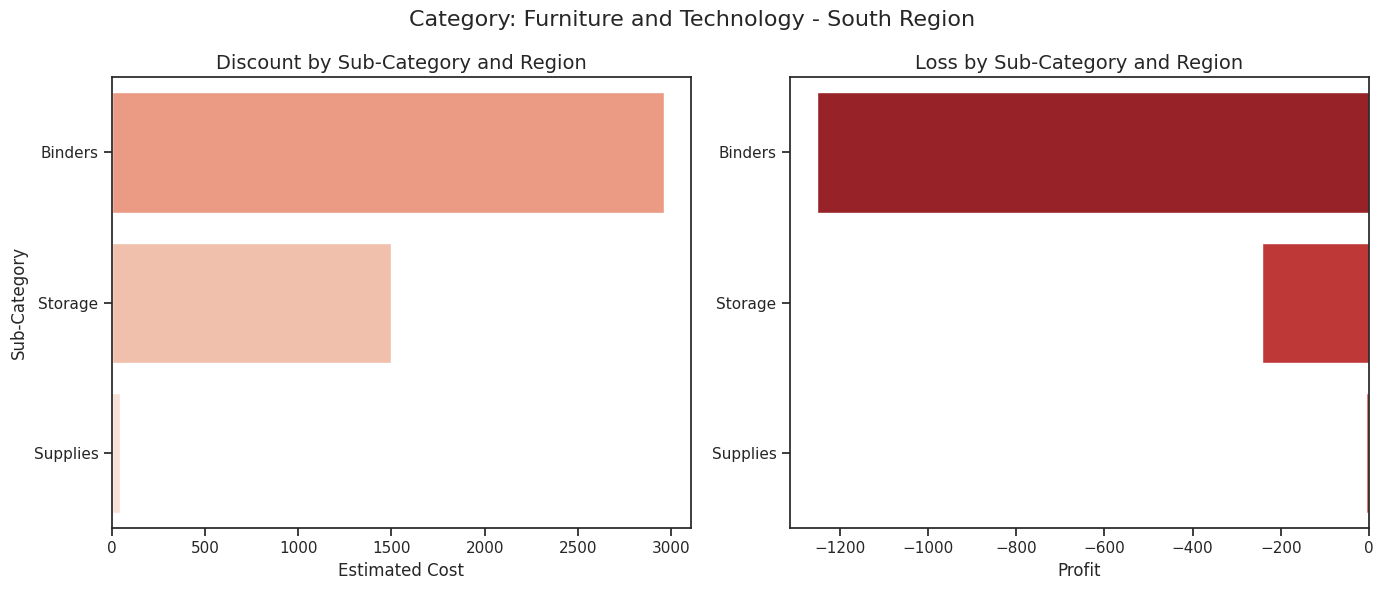

In [ ]:
def plot_category_subcategory_loss_grid_with_region(data, category_column, sub_category_column, region_column,
                                                    discount_column, profit_column, title='Category:',
                                                    palette='Reds', figsize=(14, 6)):
    """
    Plots discount and profit side by side for each sub-category grouped by category and region.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        category_column (str): Column name for category.
        sub_category_column (str): Column name for sub-category.
        region_column (str): Column name for region.
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    # Set up the grid for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Sort the data by profit to determine the order
    data_sorted = data.sort_values(by=profit_column, ascending=True)

    # custom palettes
    custom_palette_1 = sns.color_palette("Reds", n_colors=7)[-7:]
    custom_palette_2 = sns.color_palette("Reds_r", n_colors=6)[0:]


    # Plot Discount
    sns.barplot(
        data=data_sorted,
        x=discount_column,
        y=sub_category_column, order=data_sorted[sub_category_column],
        hue=data_sorted[discount_column], palette=custom_palette_1, legend=False, dodge=False,
        ax=axes[0]
    )
    axes[0].set_title("Discount by Sub-Category and Region", fontsize=14)
    axes[0].set_xlabel(discount_column, fontsize=12)
    axes[0].set_ylabel(sub_category_column.replace('_', ' '), fontsize=12)

    # Plot Profit
    sns.barplot(
        data=data_sorted,
        x=profit_column,
        y=sub_category_column, order=data_sorted[sub_category_column], ci=False,
        hue=data_sorted[profit_column], palette=custom_palette_2, legend=False, dodge=False,
        ax=axes[1]
    )
    axes[1].set_title("Loss by Sub-Category and Region", fontsize=14)
    axes[1].set_xlabel(profit_column, fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout
    plt.suptitle(f"Category: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()



# Loop through regions and plot for each
regions = df['Region'].unique()

for r in regions:
    # Filter data for the current region
    ft_table_region = office_table_sorted[office_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    plot_category_subcategory_loss_grid_with_region(
        data=ft_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Estimated Cost',  # Fixed missing quote
        profit_column='Profit',
        title=f"Furniture and Technology - {r} Region"
    )

## Region, Category, Sub-Category - Summary Statistics

In [ ]:
# import warnings
# # Suppress warnings
# warnings.filterwarnings("ignore")

# Define metrics for visualization
metrics = [
    'Profit',
    'Profit Margin',
    'Profitability Ratio',
    'Estimated Cost',
    'Sales',
    'Discount',
    'Order Count',
    'Quantity',
    'Regional Market Share (%)'
]

# Define the summary statistics to plot
summary_stats = ['Mean', 'Median', 'Mode', 'Standard Deviation']

# Generate the summary table grouped by Category and Sub-Category
table_subcategory_region = dvu.summarize_metrics_by_group_multi(
    data=df,
    metrics=metrics,
    group_columns=['Region', 'Category', 'Sub-Category']
)

# Sort by Total Profit (ascending for losses)
# Sort by Region, Profit, and Summary_Stats
table_subcategory_region_sorted = table_subcategory_region.sort_values(
    ['Summary_Stats', 'Region', 'Profit'],
    ascending=[True, True, True]
)

# Select the top 5 sub-categories with the largest losses per region
top_losses_by_region = (
    table_subcategory_region_sorted
    .groupby('Region')
    .head(5)
    .reset_index(drop=True)
)

# Display the results
print("\nTop 5 Sub-Categories with Largest Losses per Region:")
top_losses_by_region



Top 5 Sub-Categories with Largest Losses per Region:


,Summary_Stats,Region,Category,Sub-Category,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Central,Office Supplies,Appliances,-142.566968,-251.184211,-71.381509,199.079284,56.512316,0.800000,7.605263,3.421053,21.819594
1,Mean,Central,Furniture,Tables,-69.503414,-34.530612,-22.555060,267.529200,198.025786,0.385714,6.785714,2.785714,21.819594
2,Mean,Central,Furniture,Furnishings,-48.675455,-70.253623,-39.807503,101.867861,53.192406,0.600000,7.463768,3.985507,21.819594
3,Mean,Central,Office Supplies,Binders,-35.620348,-161.483051,-61.722618,57.386060,21.765712,0.800000,7.305085,4.237288,21.819594
4,Mean,Central,Furniture,Chairs,-34.418250,-14.714286,-11.951685,280.313550,245.895300,0.300000,6.733333,3.633333,21.819594
5,Mean,East,Technology,Machines,-138.287800,-81.111111,-44.632259,296.397800,158.110000,0.700000,11.333333,4.000000,29.548188
6,Mean,East,Furniture,Bookcases,-86.623864,-43.113636,-26.707720,325.973864,239.350000,0.390909,6.727273,3.545455,29.548188
7,Mean,East,Furniture,Tables,-76.297819,-27.976190,-21.077391,342.641858,266.344038,0.380769,7.230769,2.384615,29.548188
8,Mean,East,Technology,Phones,-40.440274,-23.235294,-18.362788,232.824803,192.384529,0.400000,7.558824,3.411765,29.548188
9,Mean,East,Office Supplies,Supplies,-30.470480,-21.500000,-17.690581,170.360080,139.889600,0.200000,7.000000,2.600000,29.548188


Figure saved as /content/region_catgeory_subcategory.png


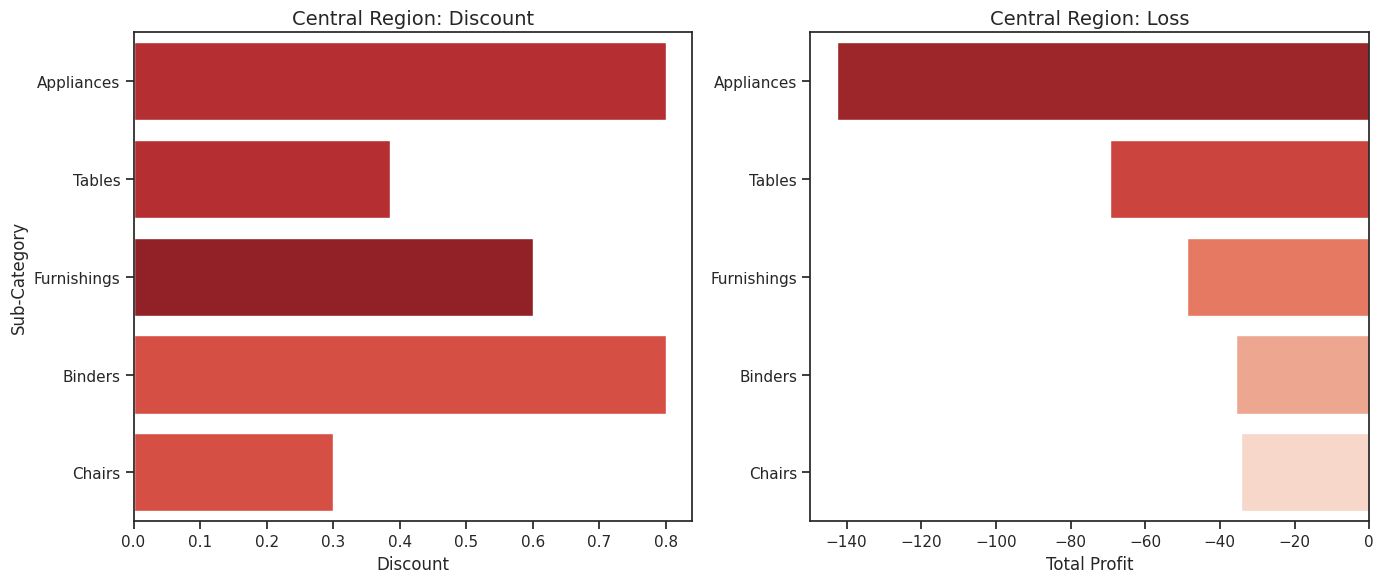

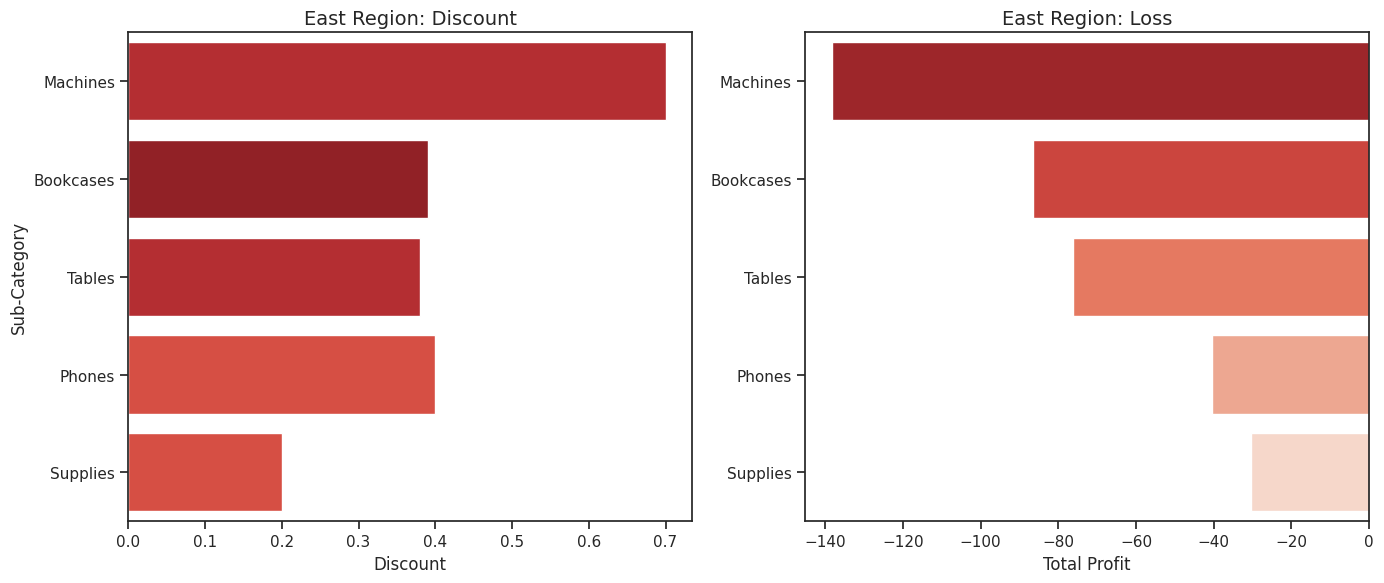

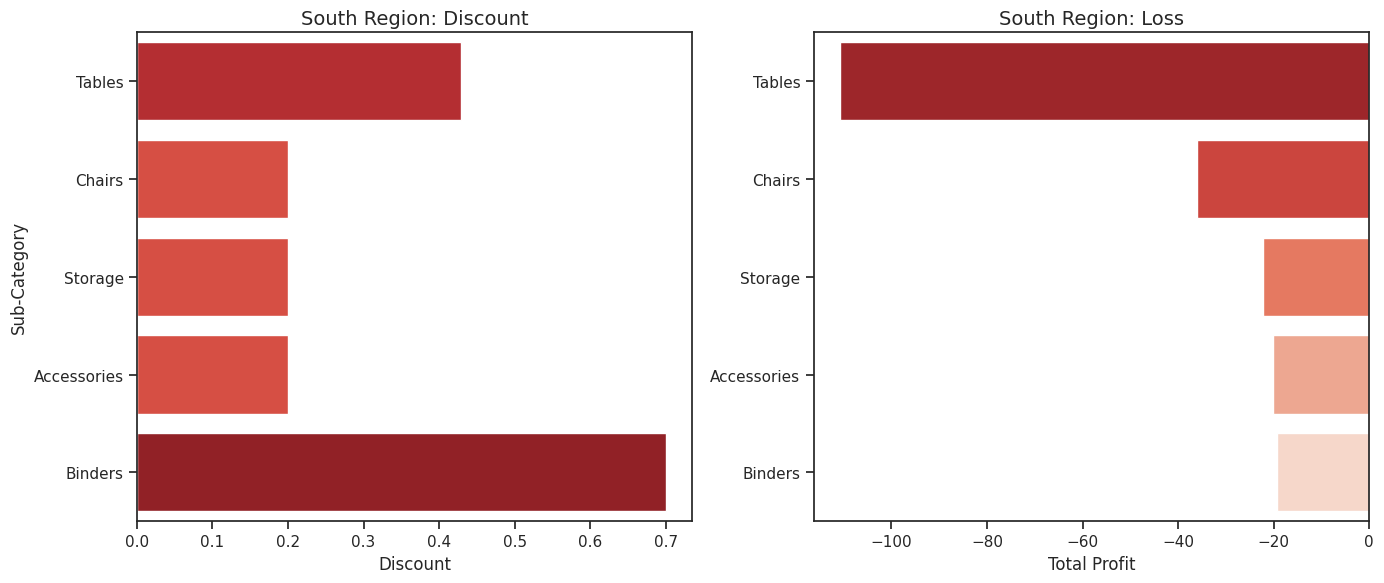

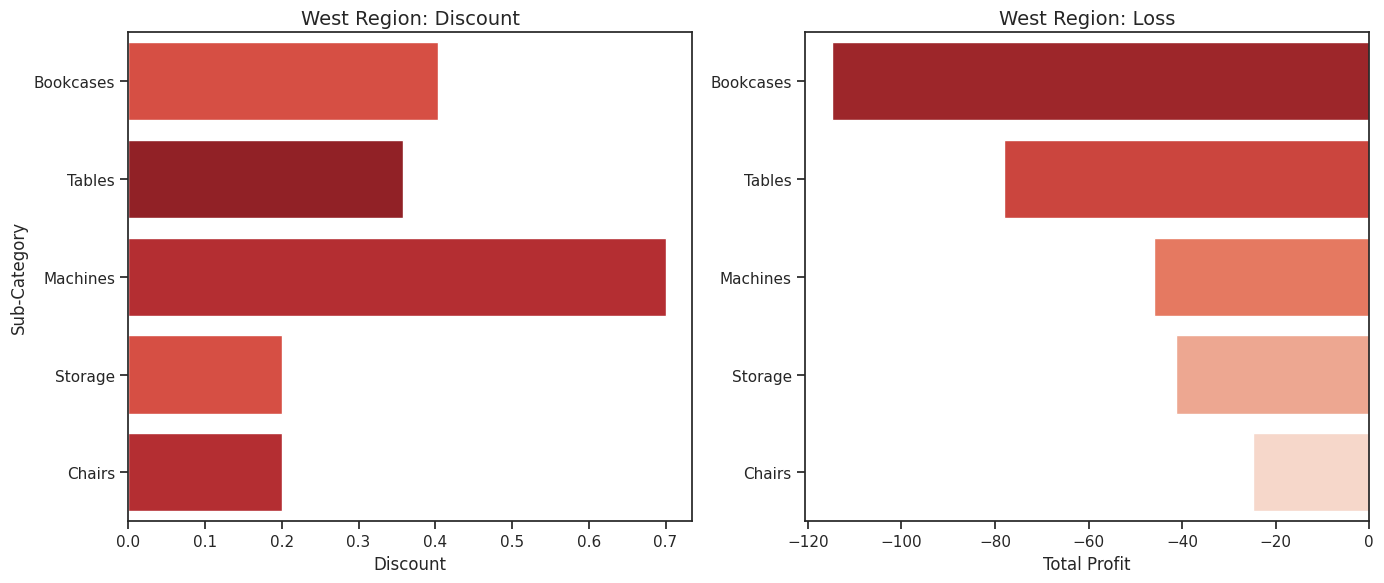

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define regions and columns for the plot
regions = top_losses_by_region['Region'].unique()
group_by_column = "Sub-Category"
discount_column = "Discount"
profit_column = "Profit"

# Visualize the metrics and save the figure
save_path = "/content/region_catgeory_subcategory.png"

# Call the function for all regions
dvu.plot_discount_loss_grid(
    data=top_losses_by_region,
    region_column="Region",
    group_by_column=group_by_column,
    discount_column=discount_column,
    profit_column=profit_column,
    regions=regions,
    figsize=(14, 6)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


### Region, Category, Sub-Category Analysis - Summary Statistics

#### **Central Region**
1. **Largest Losses**:
   - **Appliances (Office Supplies)**: Loss of **-\$5,417**, with an extremely poor **profit margin (-251%)** and high discount rate (**80%**).
   - **Binders (Office Supplies)**: Loss of **-\$4,203**, driven by high demand but paired with inefficiencies and steep discounts.
2. **Furniture Losses**:
   - **Furnishings**: Loss of **-$3,358**, with a **profit margin of -70%**. Despite moderate sales, costs remain high.
   - **Chairs** and **Tables**: Smaller losses but reflect inefficiencies that need addressing.
3. **Recommendation**:
   - Reassess discounting strategies, especially for **Appliances** and **Binders**.
   - Optimize Furniture operations to reduce high costs in Furnishings and Tables.

---

#### **East Region**
1. **Significant Loss Drivers**:
   - **Tables (Furniture)**: Loss of **-\$1,983**, with inefficiencies in cost management (**profit margin -27.98%**).
   - **Binders (Office Supplies)**: Loss of **-\$1,829**, driven by poor cost efficiency despite strong demand.
   - **Phones (Technology)**: Loss of **-$1,375**, with discounts eroding margins (**-23% profit margin**).
2. **Recommendation**:
   - Focus on improving cost efficiency in high-loss sub-categories like **Binders** and **Tables**.
   - Reduce discounting for Phones, as the category shows potential with higher sales.

---

#### **South Region**
1. **Small-Scale Losses**:
   - **Binders (Office Supplies)**: Loss of **-\$1,251**, driven by excessive discounting (**70%**).
   - **Tables (Furniture)**: Loss of **-$775**, reflecting inefficiencies in cost management.
   - Losses in sub-categories like **Chairs** and **Storage** are relatively minor but consistent.
2. **Recommendation**:
   - Prioritize growth strategies to increase market share, as the South has the smallest presence and lowest losses.
   - Streamline operations in Office Supplies and Furniture to minimize inefficiencies.

---

#### **West Region**
1. **Focused Loss Drivers**:
   - **Bookcases (Furniture)**: Loss of **-\$1,493**, with inefficiencies reflected in a **profit margin of -78%**.
   - **Tables (Furniture)**: Loss of **-$1,484**, due to high costs relative to sales.
   - Smaller losses in **Chairs** and **Storage**, but inefficiencies persist.
2. **Recommendation**:
   - Optimize cost structures for Bookcases and Tables, which drive the majority of losses.
   - Leverage strong regional performance to offset losses in high-demand sub-categories.

---

#### **General Recommendations**
1. **Address Key Loss Drivers**:
   - Focus on sub-categories with the largest losses, such as **Appliances**, **Binders**, and **Tables**, to improve overall profitability.
2. **Reassess Discounting**:
   - Excessive discounts (**up to 80%**) in sub-categories like Appliances and Binders are eroding profitability. Implement more targeted, strategic discounting.
3. **Leverage Regional Strengths**:
   - Apply best practices from lower-loss regions like the West to optimize operations in the Central and East regions.
4. **Scale Low-Loss Sub-Categories**:
   - Sub-categories like **Chairs** and **Storage** in smaller regions show potential for improvement with targeted cost optimization.



## Data Utils Script

In [2]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Script

In [3]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()

def plot_sales_distribution_2(data, column='Sales', title='Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total value
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of the column
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Dynamic x-axis
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)

    # Automatically format x-axis based on the data range
    x_max = data[column].max()
    x_min = data[column].min()
    x_ticks = plt.MaxNLocator(nbins=6).tick_values(x_min, x_max)
    axes[2].xaxis.set_ticks(x_ticks)
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()

# Define a function to calculate summary statistics for a given column
def calculate_discount_stats(data, column='Discount'):
    """
    Calculates summary statistics for a specific column in the given dataset.

    Args:
        data (pd.DataFrame): The dataset to calculate statistics from.
        column (str): The column to calculate statistics for.

    Returns:
        dict: A dictionary of summary statistics.
    """
    stats = {
        'Min': data[column].min(),
        'Max': data[column].max(),
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std()
    }
    return stats

def plot_discount_summary(discount_summary_table, title="Summary Statistics for Discounts"):
    """
    Plots a grouped barplot for discount summary statistics.

    Args:
        discount_summary_table (pd.DataFrame): DataFrame containing summary statistics for discounts.
        title (str): Title for the plot.

    Returns:
        None: Displays the barplot.
    """
    # Melt the DataFrame to long format for easier plotting with Seaborn
    discount_summary_melted = discount_summary_table.melt(
        id_vars='Statistic',
        var_name='Group',
        value_name='Value'
    )

    # Set Seaborn theme
    sns.set_theme(style="whitegrid", context="talk")

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=discount_summary_melted,
        x='Statistic',
        y='Value',
        hue='Group',
        palette=['red', 'green']
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Statistic", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Adjust layout
    plt.tight_layout()
    plt.show()

def plot_discount_kde(data_losses, data_profits, column='Discount', title='KDE Plot for Discounts'):
    """
    Plots overlaying KDE plots for discounts in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the KDE plot.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", linewidth=2)

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Add legend
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_discount_boxplot(data_losses, data_profits, column='Discount', title='Boxplot for Discounts'):
    """
    Plots side-by-side boxplots for discounts in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the boxplot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Create copies of the data to avoid SettingWithCopyWarning
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        showfliers=True
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Group", fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Remove legend for simplicity
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    # plt.show()

def plot_discount_analysis_grid(data_losses, data_profits, summary_table, column='Discount'):
    """
    Creates a grid of plots for discount analysis, including:
    - A barplot of summary statistics
    - A KDE plot of discount distributions
    - A boxplot comparing discounts by profitability.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        summary_table (pd.DataFrame): Summary statistics table for discounts.
        column (str): The column to analyze. Default is 'Discount'.

    Returns:
        None: Displays the plots.
    """
    import pandas as pd
    import matplotlib.gridspec as gridspec

    # Create copies to avoid warnings
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Set up the grid layout
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1, 1], hspace=0.2, wspace=0.2)

    # Plot 1: Summary statistics barplot
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=summary_table.melt(id_vars=['Statistic'], var_name='Group', value_name='Value'),
        x='Statistic',
        y='Value',
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax1
    )
    ax1.set_title("Summary Statistics for Discounts", fontsize=14)
    ax1.set_ylabel("Value", fontsize=12)
    ax1.set_xlabel("Statistic", fontsize=12)
    ax1.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 2: KDE plot
    ax2 = fig.add_subplot(gs[1,0])
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", ax=ax2, linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", ax=ax2, linewidth=2)
    ax2.set_title("Discount Distributions", fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)
    ax2.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 3: Boxplot
    ax3 = fig.add_subplot(gs[:,1])
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax3,
        showfliers=True
    )
    ax3.set_title("Discounts by Profitability", fontsize=14)
    ax3.set_xlabel("Group", fontsize=12)
    ax3.set_ylabel(column, fontsize=12)
    ax3.legend([], [], frameon=False)  # Remove redundant legend

    # Adjust layout and display the grid
    # plt.tight_layout()
    # plt.show()


def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()






def plot_metrics_grid_2(data1, data2=None, metrics=None, group_by_column="", title1="", title2="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 1x2 grid of barplots for single or multiple datasets with multiple metrics.

    Parameters:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the y-axis.
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure metrics is not None
    metrics = metrics or []

    # Check if single or dual dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for metric in metrics:
        fig, axes = plt.subplots(1, len(datasets), figsize=figsize)

        if len(datasets) == 1:
            axes = [axes]  # Ensure axes is iterable for single plot

        for i, (data, title_suffix, ax) in enumerate(zip(datasets, titles, axes)):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False)

            # Set the category order for the plot
            category_order = data_sorted[group_by_column]

            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by_column,
                hue=metric, palette=palette, legend=False, dodge=False,
                order=category_order,  # Explicitly set the order
                ax=ax
            )
            ax.set_title(f"{title_suffix}: {metric.replace('_', ' ')}", fontsize=14)
            ax.set_xlabel(metric.replace('_', ' '), fontsize=12)
            ax.set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()


def plot_metrics_grid_3(data1, data2=None, discount_column="", loss_column="", group_by_column="", title1="", title2="", palette="Reds_r", figsize=(12, 6)):
    """
    Plots a 1x2 grid of barplots for discounts and losses by subcategories or other groupings.

    Parameters:
        data1 (pd.DataFrame): Primary dataset (e.g., Furniture & Technology).
        data2 (pd.DataFrame, optional): Secondary dataset for comparison (e.g., Office Supplies). Defaults to None.
        discount_column (str): Column name for discounts.
        loss_column (str): Column name for losses.
        group_by_column (str): Column to group by on the y-axis (e.g., Sub-Category).
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette for the plots.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    # Check if dual datasets or single dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for data, title in zip(datasets, titles):
        # Set up the figure
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # Sort data and reset categories for Discount
        discount_sorted = data.sort_values(by=discount_column, ascending=False)
        discount_sorted[group_by_column] = discount_sorted[group_by_column].astype('object').astype('category')
        discount_sorted[group_by_column] = discount_sorted[group_by_column].cat.reorder_categories(discount_sorted[group_by_column].unique())

        # Sort data and reset categories for Loss
        loss_sorted = data.sort_values(by=loss_column, ascending=True)
        loss_sorted[group_by_column] = loss_sorted[group_by_column].astype('object').astype('category')
        loss_sorted[group_by_column] = loss_sorted[group_by_column].cat.reorder_categories(loss_sorted[group_by_column].unique())

        # Define custom palettes
        custom_palette = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Darker reds

        # Plot Discount
        sns.barplot(
            data=discount_sorted,
            x=discount_column,
            y=group_by_column, order=loss_sorted[group_by_column],
            hue=group_by_column, palette=custom_palette, legend=False, dodge=False,
            ax=axes[0], ci=None
        )
        axes[0].set_title(f"{title}: Discounts", fontsize=14)
        axes[0].set_xlabel(discount_column.replace('_', ' '), fontsize=12)
        axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Plot Loss
        sns.barplot(
            data=loss_sorted,
            x=loss_column,
            y=group_by_column, order=loss_sorted[group_by_column],
            hue=group_by_column, palette=palette, legend=False, dodge=False,
            ax=axes[1], ci=None
        )
        axes[1].set_title(f"{title}: Losses", fontsize=14)
        axes[1].set_xlabel(loss_column.replace('_', ' '), fontsize=12)
        axes[1].set_ylabel("")  # Remove ylabel to avoid redundancy

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()

def plot_metric_grid_single(data, metrics, group_by, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 2x2 grid of barplots for a given dataset and multiple metrics.

    Parameters:
    - data: DataFrame
        The dataset to plot (e.g., filtered data by region).
    - metrics: list
        The metrics to plot (e.g., ['Total_Profit', 'Total_Profit_Margin']).
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title (e.g., 'Central Region: ').
    - palette: str
        The color palette to use for the barplots.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Loop through metrics and plot each
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False).reset_index(drop=True)

            # Use group_by column values for ordering
            order = data_sorted[group_by].tolist()

            # Plot the barplot
            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by,
                palette=palette,
                order=order,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{metric.replace('_', ' ')}", fontsize=14)
            axes[i].set_xlabel(metric.replace('_', ' '), fontsize=12)
            axes[i].set_ylabel(group_by.replace('_', ' '), fontsize=12)
        else:
            # Turn off unused subplots
            axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_filtered_metrics_grid(data, selected_regions, selected_subcategories, metrics, title, palette="Greens", figsize=(20, 16)):
    """
    Plots a grid of barplots for specified metrics filtered by regions and sub-categories.

    Parameters:
    - data: DataFrame
        The dataset containing the metrics and filters.
    - selected_regions: list
        The regions to filter by.
    - selected_subcategories: list
        The sub-categories to filter by.
    - metrics: dict
        A dictionary of metrics with keys as display names and values as column names to plot.
    - title: str
        The title of the entire plot grid.
    - palette: str
        The Seaborn color palette to use for the plots.
    - figsize: tuple
        The size of the figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filter the data based on selected regions and sub-categories
    filtered_data = data[
        (data['Region'].isin(selected_regions)) &
        (data['Sub-Category'].isin(selected_subcategories))
    ].copy()

    # Convert to categorical for consistent plotting
    filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
    filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

    # Create a custom palette
    # Define the number of colors needed
    num_colors = len(selected_regions)

    # Select colors from the bolder end of the spectrum
    custom_palette = sns.color_palette("Reds", n_colors=8)[-num_colors:]


    # Set up the grid dimensions
    n_cols = 3  # Number of columns
    n_rows = -(-len(metrics) // n_cols)  # Ceiling division for rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Plot each metric
    for (display_name, column_name), ax in zip(metrics.items(), axes):
        sns.barplot(
            data=filtered_data,
            x="Sub-Category",
            y=column_name,
            hue="Region",
            palette=custom_palette,
            edgecolor="black",
            ax=ax
        )
        ax.set_title(display_name, fontsize=12)
        ax.set_xlabel("Sub-Category", fontsize=10)
        ax.set_ylabel(display_name, fontsize=10)
        ax.tick_params(axis="x", rotation=45)

    # Turn off unused axes
    for i in range(len(metrics), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    # plt.show()

def calculate_core_statistics(data, column):
    """
    Calculates core statistics (mean, median, mode, and standard deviation) for a given column in a DataFrame.

    Parameters:
    - data (DataFrame): The dataset containing the column.
    - column (str): The column for which to calculate statistics.

    Returns:
    - dict: A dictionary containing the core statistics.
    """
    mode_value = data[column].mode()
    mode_value = mode_value.iloc[0] if not mode_value.empty else None  # Handle cases with no mode
    core_stats = {
        "Mean": data[column].mean(),
        "Median": data[column].median(),
        "Mode": mode_value,
        "Standard Deviation": data[column].std(),
    }
    return core_stats

def summarize_metrics_by_group(data, metrics, group_column):
    """
    Generates a table of summary statistics for specified metrics grouped by a specified column.

    Parameters:
    - data (DataFrame): The dataset containing the metrics and group column.
    - metrics (list): The list of metric column names to summarize.
    - group_column (str): The column name for the grouping.

    Returns:
    - DataFrame: A summary table with summary statistics for each group.
    """
    # Initialize an empty list to store results
    summary_rows = []

    # Group data by the specified column
    grouped = data.groupby(group_column, observed=True)

    # Iterate over each group and calculate summary statistics for metrics
    for group, group_data in grouped:
        for stat_name, func in {
            "Mean": pd.Series.mean,
            "Median": pd.Series.median,
            "Mode": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
            "Standard Deviation": pd.Series.std,
        }.items():
            # Calculate stats for each metric
            row = {"Summary_Stats": stat_name, group_column: group}
            row.update({metric: func(group_data[metric]) for metric in metrics})
            summary_rows.append(row)

    # Convert the results into a DataFrame
    summary_table = pd.DataFrame(summary_rows)

    return summary_table


def summarize_metrics_by_group_multi(data, metrics, group_columns):
    """
    Generates a table of summary statistics for specified metrics grouped by multiple columns.

    Parameters:
    - data (DataFrame): The dataset containing the metrics and group columns.
    - metrics (list): The list of metric column names to summarize.
    - group_columns (list): The column names for grouping.

    Returns:
    - DataFrame: A summary table with summary statistics for each group.
    """
    # Initialize an empty list to store results
    summary_rows = []

    # Group data by the specified columns
    grouped = data.groupby(group_columns, observed=True)

    # Iterate over each group and calculate summary statistics for metrics
    for group, group_data in grouped:
        for stat_name, func in {
            "Mean": pd.Series.mean,
            "Median": pd.Series.median,
            "Mode": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
            "Standard Deviation": pd.Series.std,
        }.items():
            # Calculate stats for each metric
            row = {"Summary_Stats": stat_name}
            row.update(dict(zip(group_columns, group if isinstance(group, tuple) else [group])))
            row.update({metric: func(group_data[metric]) for metric in metrics})
            summary_rows.append(row)

    # Convert the results into a DataFrame
    summary_table = pd.DataFrame(summary_rows)

    return summary_table


# def plot_summary_stats_grid(data, metric, group_by_column, stats, title_prefix="", palette="Greens_d", figsize=(10,8)):
#     """
#     Plots a 2x2 grid of barplots for a single metric grouped by a specified column,
#     with each plot showing a different summary statistic.

#     Parameters:
#     - data (DataFrame): The dataset containing the metric and group-by column.
#     - metric (str): The metric to plot (e.g., 'Discount').
#     - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
#     - stats (list): A list of summary statistics to plot (e.g., ['Mean', 'Median', 'Mode', 'Standard Deviation']).
#     - title_prefix (str): A prefix for the plot titles (e.g., 'Discount: ').
#     - palette (str): The Seaborn color palette to use for the plots.
#     - figsize (tuple): The size of the entire figure (width, height).

#     Returns:
#     - None: Displays the plots.
#     """
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     # Set up a 2x2 grid
#     n_rows, n_cols = 2, 2
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
#     axes = axes.flatten()

#     # Plot each summary statistic
#     for i, stat in enumerate(stats):
#         if i < len(stats):
#             sns.barplot(
#                 data=data,
#                 x=group_by_column,
#                 y=metric,
#                 hue=metric,
#                 palette=palette,
#                 ax=axes[i], legend=False,
#                 dodge=False
#             )
#             axes[i].set_title(f"{title_prefix}{stat}", fontsize=12)
#             axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
#             axes[i].set_ylabel(metric.replace('_', ' '), fontsize=10)
#         else:
#             axes[i].axis('off')  # Turn off unused subplots

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()

def plot_summary_stats_grid_year(data, metric, group_by_column, stats, title_prefix="", palette="Greens_d", figsize=(10, 8)):
    """
    Plots a 2x2 grid of barplots for a single metric grouped by a specified column,
    with each plot showing a different summary statistic.

    Parameters:
    - data (DataFrame): The dataset containing the metric and group-by column.
    - metric (str): The metric to plot (e.g., 'Discount').
    - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
    - stats (list): A list of summary statistics to plot (e.g., ['Mean', 'Median', 'Mode', 'Standard Deviation']).
    - title_prefix (str): A prefix for the plot titles (e.g., 'Discount: ').
    - palette (str): The Seaborn color palette to use for the plots.
    - figsize (tuple): The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Plot each summary statistic
    for i, stat in enumerate(stats):
        if i < len(stats):
            sns.barplot(
                data=data[data['Summary_Stats'] == stat],  # Filter for the current stat
                x=group_by_column,
                y=metric,
                hue=metric, palette=palette, legend=False, dodge=False,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{stat}", fontsize=12)
            axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
            axes[i].set_ylabel(metric.replace('_', ' '), fontsize=10)
        else:
            axes[i].axis('off')  # Turn off unused subplots

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_summary_stats_grid(data, metric, group_by_column, stats, title_prefix="", palette="Greens_d", figsize=(10, 8)):
    """
    Plots a 2x2 grid of barplots for a single metric grouped by a specified column,
    with each plot showing a different summary statistic.

    Parameters:
    - data (DataFrame): The dataset containing the metric and group-by column.
    - metric (str): The metric to plot (e.g., 'Discount').
    - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
    - stats (list): A list of summary statistics to plot (e.g., ['Mean', 'Median', 'Mode', 'Standard Deviation']).
    - title_prefix (str): A prefix for the plot titles (e.g., 'Discount: ').
    - palette (str): The Seaborn color palette to use for the plots.
    - figsize (tuple): The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Determine a consistent order based on the absolute value of the metric for all stats
    consistent_order = data.sort_values(by=metric, key=lambda x: abs(x), ascending=False)[group_by_column].unique()

    # Plot each summary statistic
    for i, stat in enumerate(stats):
        if i < len(stats):
            # Filter for the current stat
            stat_data = data[data['Summary_Stats'] == stat].copy()
            stat_data[group_by_column] = pd.Categorical(
                stat_data[group_by_column],
                categories=consistent_order,
                ordered=True
            )

            # Plot the barplot
            sns.barplot(
                data=stat_data,
                x=group_by_column,
                y=metric,
                hue=metric, palette=palette,legend=False, dodge=False,
                order=consistent_order,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{stat}", fontsize=12)
            axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
            axes[i].set_ylabel(metric.replace('_', ' '), fontsize=10)
        else:
            axes[i].axis('off')  # Turn off unused subplots

    # Adjust layout
    plt.tight_layout()
    # plt.show()



# def plot_discount_loss_grid(data, region_column, group_by_column, discount_column, profit_column, regions, figsize=(14, 6)):
#     """
#     Plots discount and profit side by side for each region in a 1x2 grid.

#     Parameters:
#         data (pd.DataFrame): Dataset to plot.
#         region_column (str): Column name for regions.
#         group_by_column (str): Column to group by (e.g., 'Sub-Category').
#         discount_column (str): Column name for discount data.
#         profit_column (str): Column name for profit data.
#         regions (list): List of regions to plot.
#         palette (str): Seaborn palette for the plots.
#         figsize (tuple): Figure size for the plots.

#     Returns:
#         None: Displays the plots.
#     """
#     for region in regions:
#         # Filter data for the current region
#         region_data = data[data[region_column] == region].copy()

#         # Ensure the group_by_column is categorical and ordered
#         region_data[group_by_column] = region_data[group_by_column].astype('category')
#         region_data[group_by_column] = region_data[group_by_column].cat.set_categories(region_data[group_by_column].unique(), ordered=True)

#         # Set up the grid for side-by-side plots
#         fig, axes = plt.subplots(1, 2, figsize=figsize)

#         custome_palette = sns.color_palette("Reds", n_colors=5)[-5:]
#         custome_palette_2 = sns.color_palette("Reds_r", n_colors=5)[0:]

#         # Plot discount
#         sns.barplot(
#             data=region_data,
#             x=discount_column,
#             y=group_by_column,
#             hue=region_data[discount_column], palette=custome_palette, order=region_data[group_by_column].unique(),
#             legend=False, dodge=False,
#             ax=axes[0]
#         )
#         axes[0].set_title(f"{region} Region: Discount", fontsize=14)
#         axes[0].set_xlabel("Total Discount", fontsize=12)
#         axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

#         # custome_palette_2 = sns.color_palette("Reds", n_colors=5)[:5]

#         # Plot profit
#         sns.barplot(
#             data=region_data,
#             x=profit_column,
#             y=group_by_column,
#             hue=profit_column, palette=custome_palette_2, order=region_data[group_by_column].unique(),
#             legend=False, dodge=False,
#             ax=axes[1]
#         )
#         axes[1].set_title(f"{region} Region: Loss", fontsize=14)
#         axes[1].set_xlabel("Total Profit", fontsize=12)
#         axes[1].set_ylabel("")  # No need for y-axis label on the second plot

#         # Adjust layout
#         plt.tight_layout()
#         # plt.show()

# def plot_discount_loss_grid(data, region_column, group_by_column, discount_column, profit_column, regions, figsize=(14, 6)):
#     """
#     Plots discount and profit side by side for each region in a 1x2 grid.

#     Parameters:
#         data (pd.DataFrame): Dataset to plot.
#         region_column (str): Column name for regions.
#         group_by_column (str): Column to group by (e.g., 'Sub-Category').
#         discount_column (str): Column name for discount data.
#         profit_column (str): Column name for profit data.
#         regions (list): List of regions to plot.
#         palette (str): Seaborn palette for the plots.
#         figsize (tuple): Figure size for the plots.

#     Returns:
#         None: Displays the plots.
#     """
#     for region in regions:
#         # Filter data for the current region
#         region_data = data[data[region_column] == region].copy()

#         # Ensure the group_by_column is categorical and ordered
#         region_data[group_by_column] = region_data[group_by_column].astype('category')
#         region_data[group_by_column] = region_data[group_by_column].cat.set_categories(region_data[group_by_column].unique(), ordered=True)

#         # Set up the grid for side-by-side plots
#         fig, axes = plt.subplots(1, 2, figsize=figsize)

#         custome_palette = sns.color_palette("Reds", n_colors=5)[-5:]
#         custome_palette_2 = sns.color_palette("Reds_r", n_colors=5)[0:]

#         # Plot discount
#         sns.barplot(
#             data=region_data,
#             x=discount_column,
#             y=group_by_column,
#             hue=region_data[discount_column], palette=custome_palette, order=region_data[group_by_column].unique(),
#             legend=False, dodge=False,
#             ax=axes[0]
#         )
#         axes[0].set_title(f"{region} Region: {discount_column}", fontsize=14)
#         axes[0].set_xlabel(f"{discount_column}", fontsize=12)
#         axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

#         # custome_palette_2 = sns.color_palette("Reds", n_colors=5)[:5]

#         # Plot profit
#         sns.barplot(
#             data=region_data,
#             x=profit_column,
#             y=group_by_column,
#             hue=region_data[profit_column], palette=custome_palette_2, order=region_data[group_by_column].unique(),
#             legend=False, dodge=False,
#             ax=axes[1]
#         )
#         axes[1].set_title(f"{region} Region: Loss", fontsize=14)
#         axes[1].set_xlabel("Total Profit", fontsize=12)
#         axes[1].set_ylabel("")  # No need for y-axis label on the second plot

#         # Adjust layout
#         plt.tight_layout()
#         plt.show()

def plot_discount_loss_grid(data, region_column, group_by_column, discount_column, profit_column, regions, figsize=(14, 6)):
    """
    Plots discount and profit side by side for each region in a 1x2 grid, sorting by absolute values.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        region_column (str): Column name for regions.
        group_by_column (str): Column to group by (e.g., 'Sub-Category').
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        regions (list): List of regions to plot.
        palette (str): Seaborn palette for the plots.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    for region in regions:
        # Filter data for the current region
        region_data = data[data[region_column] == region].copy()

        # Sort data by absolute values of profit for consistent ordering
        region_data = region_data.assign(
            Sort_Key=region_data[profit_column].abs()
        ).sort_values(by="Sort_Key", ascending=False)
        region_data[group_by_column] = region_data[group_by_column].astype('category')
        region_data[group_by_column] = region_data[group_by_column].cat.set_categories(
            region_data[group_by_column].unique(), ordered=True
        )
        region_data.drop(columns="Sort_Key", inplace=True)  # Clean up after sorting

        # Set up the grid for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        custom_palette = sns.color_palette("Reds", n_colors=7)[-3:]
        custom_palette_2 = sns.color_palette("Reds_r", n_colors=5)[0:]

        # Plot discount
        sns.barplot(
            data=region_data,
            x=discount_column,
            y=group_by_column,
            hue=region_data[discount_column],
            palette=custom_palette,
            order=region_data[group_by_column].unique(),
            legend=False,
            dodge=False,
            ax=axes[0]
        )
        axes[0].set_title(f"{region} Region: {discount_column}", fontsize=14)
        axes[0].set_xlabel(f"{discount_column}", fontsize=12)
        axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Plot profit
        sns.barplot(
            data=region_data,
            x=profit_column,
            y=group_by_column,
            hue=region_data[profit_column],
            palette=custom_palette_2,
            order=region_data[group_by_column].unique(),
            legend=False,
            dodge=False,
            ax=axes[1]
        )
        axes[1].set_title(f"{region} Region: Loss", fontsize=14)
        axes[1].set_xlabel("Total Profit", fontsize=12)
        axes[1].set_ylabel("")  # No need for y-axis label on the second plot

        # Adjust layout
        plt.tight_layout()
        # plt.show()

def plot_metrics_grid_4(data1, data2=None, discount_column="", loss_column="", group_by_column="", title1="", title2="", palette="Reds_r", figsize=(12, 6)):
    """
    Plots a 1x2 grid of barplots for discounts and losses by subcategories or other groupings.

    Parameters:
        data1 (pd.DataFrame): Primary dataset (e.g., Furniture & Technology).
        data2 (pd.DataFrame, optional): Secondary dataset for comparison (e.g., Office Supplies). Defaults to None.
        discount_column (str): Column name for discounts.
        loss_column (str): Column name for losses.
        group_by_column (str): Column to group by on the y-axis (e.g., Sub-Category).
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette for the plots.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    # Define custom palettes
    custom_palette_1 = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Darker reds
    custom_palette_2 = sns.color_palette("Reds_r", n_colors=8)[0:4]    # Lighter reds

    # Check if dual datasets or single dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for data, title in zip(datasets, titles):
        # Set up the figure
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # Sort data and reset categories for Discount
        discount_sorted = data.sort_values(by=discount_column, ascending=False)
        discount_sorted[group_by_column] = discount_sorted[group_by_column].astype('object').astype('category')
        discount_sorted[group_by_column] = discount_sorted[group_by_column].cat.reorder_categories(discount_sorted[group_by_column].unique())

        # Sort data and reset categories for Loss
        loss_sorted = data.sort_values(by=loss_column, ascending=True, key=abs)  # Sort by absolute values for losses
        loss_sorted[group_by_column] = loss_sorted[group_by_column].astype('object').astype('category')
        loss_sorted[group_by_column] = loss_sorted[group_by_column].cat.reorder_categories(loss_sorted[group_by_column].unique())

        # Plot Discount
        sns.barplot(
            data=discount_sorted,
            x=discount_column,
            y=group_by_column, order=loss_sorted[group_by_column],
            hue=group_by_column, palette=custom_palette_1, legend=False, dodge=False,
            ax=axes[0], ci=None
        )
        axes[0].set_title(f"{title}: Discounts", fontsize=14)
        axes[0].set_xlabel(discount_column.replace('_', ' '), fontsize=12)
        axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Plot Loss
        sns.barplot(
            data=loss_sorted,
            x=loss_column,
            y=group_by_column, order=loss_sorted[group_by_column],
            hue=group_by_column, palette=custom_palette_2, legend=False, dodge=False,
            ax=axes[1], ci=None
        )
        axes[1].set_title(f"{title}: Losses", fontsize=14)
        axes[1].set_xlabel(loss_column.replace('_', ' '), fontsize=12)
        axes[1].set_ylabel("")  # Remove ylabel to avoid redundancy

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()


def plot_category_subcategory_loss_grid(data, category_column, sub_category_column, discount_column, profit_column,
                                        title='Category:', palette='Reds', figsize=(14, 6)):
    """
    Plots discount and profit side by side for each sub-category grouped by category in a 1x2 grid.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        category_column (str): Column name for category.
        sub_category_column (str): Column name for sub-category.
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """

    # # Define a subset of darker greens for cost analysis
    # loss_palette = sns.color_palette("Reds", n_colors=6)[3:]  # Select the darker shades

    # Set up the grid for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Sort the data by profit to determine the order
    # data_sorted = data.sort_values(by=profit_column, ascending=True)

    # # Ensure Sub-Category is ordered
    # data_sorted[sub_category_column] = data_sorted[sub_category_column].astype('category')
    # data_sorted[sub_category_column] = data_sorted[sub_category_column].cat.reorder_categories(data_sorted[sub_category_column].unique())

    # Plot Discount
    sns.barplot(
        data=data,
        x=discount_column,
        y=sub_category_column, order=data[sub_category_column],
        # hue=data_sorted[category_column],  # Use category as hue
        hue=profit_column,  # Use profit column as hue
        palette=palette, legend=False, dodge=False,
        ax=axes[0]
    )
    axes[0].set_title("Discount by Sub-Category", fontsize=14)
    axes[0].set_xlabel(discount_column, fontsize=12)
    axes[0].set_ylabel(sub_category_column.replace('_', ' '), fontsize=12)

    # Plot Profit
    sns.barplot(
        data=data,
        x=profit_column,
        y=sub_category_column, order=data[sub_category_column],
        # hue=data_sorted[category_column],  # Use category as hue
        hue=profit_column,  # Use profit column as hue
        palette=palette, legend=False, dodge=False,
        ax=axes[1]
    )
    axes[1].set_title("Loss by Sub-Category", fontsize=14)
    axes[1].set_xlabel(profit_column, fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout
    plt.suptitle(f"Category: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()


'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>